<span style="font-size:1.5em;"><b>Análisis de bases de datos  
Universidad Nacional de Colombia  
2024-2</b></span>
# <b>Siniestralidad Vial en Bogotá: Análisis de Datos para la Gestión de la Movilidad Segura</b>  

<span style="font-size:0.9em;">Laura Nicole Bermudez Santa - labermudezs@unal.edu.co  
David Sebastián Mendoza Cruz - damendozac@unal.edu.co  
David Alejandro Alquichire Rincón - dalquichire@unal.edu.co  
Laura Nicole Bermudez Santa - labermudezs@unal.edu.co  
Juan David Bernal Vesga - jubernalv@unal.edu.co</span>

----

La seguridad vial es un tema de vital importancia para la planificación urbana y la protección de la vida en las ciudades. En Bogotá, la Secretaría Distrital de Movilidad (SDM) ha recopilado datos detallados sobre siniestralidad vial desde el año 2007, los cuales incluyen información sobre lesionados, accidentes, causas, tipos de vehículos involucrados y actores viales. Estos datos, disponibles en la plataforma Enterprise de la SDM, representan una oportunidad única para analizar y comprender los patrones de accidentalidad en la ciudad, con el fin de contribuir a la toma de decisiones informadas en materia de seguridad vial.

Este proyecto tiene los siguientes objetivos:
1. Analizar y clasificar los accidentes de tránsito registrados en Bogotá en la plataforma de la secretaria de movilidad desde el 2007, enfocándose en la relación entre tipo de vehículo, actores viales involucrados, localidades afectadas, el estado de los incidentes, etc. Con el fin de identificar patrones clave y proporcionar insumos para la toma de decisiones en materia de seguridad vial.  
2. Proporcionar herramientas visuales que guíen la toma de decisiones en materia de seguridad vial en resultado del análisis estadístico realizado.
3. Determinar tendencias y generar pronósticos que permitan anticipar posibles escenarios de siniestralidad en el futuro, mediante una proyección temporal del comportamiento de los accidentes de tránsito, considerando variables como la frecuencia de muertes y accidentes simples.
Buscamos lo que se expone en los objetivos, pero la idea es usar datos abiertos expuestos en la página de la secretaria de movilidad donde tenemos acceso a los siguientes datos de siniestralidad:
Lesionado, accidentes, causa, vehiculo y actor.



----

### **Manipulación y limpieza de las bases de datos individuales**

La Secretaria de movilidad dispone una base de [datos abiertos](https://datos.movilidadbogota.gov.co/maps/ea243e7de8e846c8bd27e47c08771d66/about) amplia en materia de siniestrialidad en Bogotá la cual ha sido alimentada con datos desde el 2007. En esta sección depuraremos los siguientes data sets:
- __*ACCIDENTE*__: nos brinda información detallada de la cantidad de accidentes que se han registrado en la ciudad de bogotá incluyendo sus coordenadas, la clase de choque, fecha y gravedad. (En este dataset se concentra la mayoria de los datos y es de nuestro interes analizarlo a profundidad).
- __*LESIONADO*__: incluye información de las personas involucrada tales como su condición, genero y edad son los datos mas relevantes. (Sin embargo la descripción y el contenido de la información no resulta de nuestro interes).
- __*ACC_VIA*__: caracteristicas relevantes de cada via donde sucedio el accidente, resulta relevante al relacionar el estado de las vías en la ciudad de Bogotá como posible causante de siniestros en ciertos lugares o localidades.
- __*ACC_VEHICULO*__: información general del tipo de vehiculo y el uso de este ya sea publico o particular.
- __*ACC_CAUSA*__: incluye una breve descripción de una posible causa asociada al siniestro.
- __*ACC_ACTOR*__: nos brinda información relevante de la condición del actor causante del accidente.

In [104]:
# Importamos las librerias necesarias en Python

import pandas as pd 
import seaborn as sb 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import requests
%matplotlib inline

<p>Dado que le daremos prioridad al data set que contiene la información general de accidentes <b>ACCIDENTES.CSV</b> comenzaremos limpiando y manipulando la información de <b>ACC_VEHICULO</b>, <b>ACC_CAUSA</b>, <b>ACC_VIA</b> y <b>ACC_ACTOR_VIAL</b>.<p>

##### __Traemos *ACC_VEHICULO* que corresponde a la información del vehiculo implicado en el accidente mediante un llamado de API__

Traemos la información mediante un llamado a API, sin embargo como los datos se van actualizando diariamente para conservar los resultados guardamos los dataframes como archivos CSV en la carpeta __proy_datasets__ y usamos estos.

In [105]:
"""
# URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/5/query?where=1%3D1&outFields=FORMULARIO,CLASE,SERVICIO&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")
"""

'\n# URL de la API\nurl = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/5/query?where=1%3D1&outFields=FORMULARIO,CLASE,SERVICIO&outSR=4326&f=json"\n\n# Hacer la solicitud GET\nresponse = requests.get(url)\n\n# Verificar si la solicitud fue exitosa\nif response.status_code == 200:\n    # Convertir la respuesta a JSON\n    data = response.json()\n    print("Datos obtenidos exitosamente")\n'

In [106]:
"""
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

# Convertir la lista de diccionarios a DataFrame
vehiculo_data = pd.DataFrame(rows)


# Guardamos el data frame como archivo CSV 
vehiculo_data.to_csv("proy_datasets/Vehiculo_data.csv", index=False)  # Guarda el DataFrame en un archivo CSV
"""


'\nfeatures = data.get(\'features\', [])  # Obtener la lista de features\nrows = []  # Lista para almacenar los datos\n\n# Recorrer cada feature y extraer los atributos\nfor feature in features:\n    attributes = feature.get(\'attributes\', {})  # Obtener el diccionario de atributos\n    rows.append(attributes)  # Agregar los atributos a la lista\n\n# Convertir la lista de diccionarios a DataFrame\nvehiculo_data = pd.DataFrame(rows)\n\n\n# Guardamos el data frame como archivo CSV \nvehiculo_data.to_csv("proy_datasets/Vehiculo_data.csv", index=False)  # Guarda el DataFrame en un archivo CSV\n'

In [107]:
vehiculo_data = pd.read_csv("proy_datasets/Vehiculo_data.csv")
vehiculo_data.head(5)


,FORMULARIO,CLASE,SERVICIO
0,A001572817,MOTOCICLETA,PARTICULAR
1,A001572416,MOTOCICLETA,PARTICULAR
2,A001572723,AUTOMOVIL,PARTICULAR
3,A001572723,MOTOCICLETA,PARTICULAR
4,A001572723,CAMIONETA,PUBLICO


In [108]:
# Verificamos si hay valores nulos
vehiculo_data.isna().sum()

FORMULARIO    0
CLASE         0
SERVICIO      0
dtype: int64

In [109]:
# Reemplazamos cadenas vacías o espacios con NaN
vehiculo_data.replace(["", "SIN INFORMACION"," ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
vehiculo_data.dropna(inplace=True)

# Verficamos que se hayan eliminado correctamente
vehiculo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FORMULARIO  2000 non-null   object
 1   CLASE       2000 non-null   object
 2   SERVICIO    2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


El valor en formulario corresponde a un identificador de la información suministrada y a continuación mostramos la variedad de clases de vehiculos que se ven involucrados en accidentes al igual que la clasificación de estos según sus servicios.

In [110]:
print(vehiculo_data['CLASE'].value_counts())
print("")
print(vehiculo_data['SERVICIO'].value_counts())

CLASE
MOTOCICLETA        793
AUTOMOVIL          540
BUS                201
CAMIONETA          186
BICICLETA          146
CAMION, FURGON      47
CAMPERO             34
MICROBUS            14
TRACTOCAMION        13
MOTOTRICICLO        12
VOLQUETA             6
BUSETA               6
MOTOCARRO            1
NO IDENTIFICADO      1
Name: count, dtype: int64

SERVICIO
PARTICULAR          1241
PUBLICO              512
 SIN INFORMACION     215
OFICIAL               32
Name: count, dtype: int64


##### __Traemos *ACC_VIA* que corresponde a la información del estado de la via lugar del accidente mediante un llamado de API__

Traemos la información mediante un llamado a API, sin embargo como los datos se van actualizando diariamente para conservar los resultados guardamos los dataframes como archivos CSV en la carpeta __proy_datasets__ y usamos estos.

In [111]:
"""
# URL de la API
url ="https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/6/query?where=1%3D1&outFields=FORMULARIO,GEOMETRICA_A,GEOMETRICA_B,GEOMETRICA_C,UTILIZACION,CALZADAS,CARRILES,MATERIAL,ESTADO,CONDICIONES,ILUMINACION_A,AGENTE_TRANSITO,SEMAFORO&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")
"""

'\n# URL de la API\nurl ="https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/6/query?where=1%3D1&outFields=FORMULARIO,GEOMETRICA_A,GEOMETRICA_B,GEOMETRICA_C,UTILIZACION,CALZADAS,CARRILES,MATERIAL,ESTADO,CONDICIONES,ILUMINACION_A,AGENTE_TRANSITO,SEMAFORO&outSR=4326&f=json"\n\n# Hacer la solicitud GET\nresponse = requests.get(url)\n\n# Verificar si la solicitud fue exitosa\nif response.status_code == 200:\n    # Convertir la respuesta a JSON\n    data = response.json()\n    print("Datos obtenidos exitosamente")\n'

In [112]:
"""
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

via_data = pd.DataFrame(rows)
via_data.head(5)

# Guardamos el data frame como archivo CSV 
via_data.to_csv("proy_datasets/Via_data.csv", index=False)  # Guarda el DataFrame en un archivo CSV
"""

'\nfeatures = data.get(\'features\', [])  # Obtener la lista de features\nrows = []  # Lista para almacenar los datos\n\n# Recorrer cada feature y extraer los atributos\nfor feature in features:\n    attributes = feature.get(\'attributes\', {})  # Obtener el diccionario de atributos\n    rows.append(attributes)  # Agregar los atributos a la lista\n\nvia_data = pd.DataFrame(rows)\nvia_data.head(5)\n\n# Guardamos el data frame como archivo CSV \nvia_data.to_csv("proy_datasets/Via_data.csv", index=False)  # Guarda el DataFrame en un archivo CSV\n'

In [113]:
via_data = pd.read_csv("proy_datasets/Via_data.csv")
via_data.head(5)

,FORMULARIO,GEOMETRICA_A,GEOMETRICA_B,GEOMETRICA_C,UTILIZACION,CALZADAS,CARRILES,MATERIAL,ESTADO,CONDICIONES,ILUMINACION_A,AGENTE_TRANSITO,SEMAFORO
0,A001030093,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
1,A001030278,RECTA,PLANO,CON BERMAS,DOBLE SENTIDO,UNA,TRES O MAS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
2,A001029417,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
3,A001029417,RECTA,PLANO,CON BERMAS,UN SENTIDO,UNA,UNO,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
4,A001030431,CURVA,PLANO,CON BERMAS,UN SENTIDO,DOS,DOS,ASFALTO,BUENO,SECA,CON,NO,OPERANDO


In [114]:
# Revisamos valores nulos 
via_data.isna().sum()

FORMULARIO         0
GEOMETRICA_A       0
GEOMETRICA_B       0
GEOMETRICA_C       0
UTILIZACION        0
CALZADAS           0
CARRILES           0
MATERIAL           0
ESTADO             0
CONDICIONES        0
ILUMINACION_A      0
AGENTE_TRANSITO    0
SEMAFORO           0
dtype: int64

In [115]:
# Reemplazar cadenas vacías o espacios con NaN
via_data.replace(["", "SIN INFORMACION"," ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
via_data.dropna(inplace=True)

# Verficamos que se hayan eliminado correctamente
via_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FORMULARIO       2000 non-null   object
 1   GEOMETRICA_A     2000 non-null   object
 2   GEOMETRICA_B     2000 non-null   object
 3   GEOMETRICA_C     2000 non-null   object
 4   UTILIZACION      2000 non-null   object
 5   CALZADAS         2000 non-null   object
 6   CARRILES         2000 non-null   object
 7   MATERIAL         2000 non-null   object
 8   ESTADO           2000 non-null   object
 9   CONDICIONES      2000 non-null   object
 10  ILUMINACION_A    2000 non-null   object
 11  AGENTE_TRANSITO  2000 non-null   object
 12  SEMAFORO         2000 non-null   object
dtypes: object(13)
memory usage: 203.3+ KB


El valor en formulario corresponde a un identificador de la información suministrada y a continuación mostramos los posibles valores de los siguientes atributos semaforo -se indica si el semaforo se encontraba operando-, Estado -estado general de la via- Geometrica_A, Geometrica_B, Geometrica_C -descripciones de la via-, utilización -sentidos de funcionamientos-, calzadas, carriles, material de la via, condiciones al momento del accidente, iluminación y la presencia de un agente de transito.

In [116]:
print(via_data["SEMAFORO"].value_counts())
print("")
print(via_data["ESTADO"].value_counts())
print("")
print(via_data["GEOMETRICA_A"].value_counts())
print(via_data["GEOMETRICA_B"].value_counts())
print(via_data["GEOMETRICA_C"].value_counts())
print("")
print(via_data["UTILIZACION"].value_counts())
print("")
print(via_data["CALZADAS"].value_counts())
print("")
print(via_data["CARRILES"].value_counts())
print("")
print(via_data["MATERIAL"].value_counts())
print("")
print(via_data["CONDICIONES"].value_counts())
print("")
print(via_data["ILUMINACION_A"].value_counts())
print("")
print(via_data["AGENTE_TRANSITO"].value_counts())

SEMAFORO
OPERANDO        1819
NINGUNO          174
APAGADO            3
INTERMITENTE       3
OCULTO             1
Name: count, dtype: int64

ESTADO
BUENO           1969
CON HUECOS        22
PARCHADA           5
HUNDIMIENTOS       3
DERRUMBES          1
Name: count, dtype: int64

GEOMETRICA_A
RECTA    1979
CURVA      21
Name: count, dtype: int64
GEOMETRICA_B
PLANO        1968
PENDIENTE      32
Name: count, dtype: int64
GEOMETRICA_C
CON ANDEN        1216
CON BERMAS        780
BAHIA DE EST.       4
Name: count, dtype: int64

UTILIZACION
UN SENTIDO       1350
DOBLE SENTIDO     641
REVERSIBLE          9
Name: count, dtype: int64

CALZADAS
UNA           1496
DOS            377
TRES O MAS     122
VARIABLE         5
Name: count, dtype: int64

CARRILES
DOS           910
TRES O MAS    706
UNO           367
VARIABLE       17
Name: count, dtype: int64

MATERIAL
ASFALTO      1875
CONCRETO      113
AFIRMADO        9
EMPEDRADO       2
ADOQUIN         1
Name: count, dtype: int64

CONDICIONES
SECA     

Como se puede observar podriamos convertir la información del atributo *AGENTE_Transito* y *ILUMINACION_A* en un tipo de dato númerico binario haciendo uso de dummies.

In [117]:
# Usamos dummies para la información de la columna ILUMINACION_A
# 1 indica que si habia iluminación en la via y el 0 indica la ausencia de iluminación.
dummies_iluminacion = pd.get_dummies(via_data["ILUMINACION_A"],dtype=int)
via_data = via_data.join(dummies_iluminacion)
via_data.drop("ILUMINACION_A", axis=1, inplace=True)

via_data.drop("SIN", axis=1, inplace=True)
via_data.rename(columns={"CON": "ILUMINACION"}, inplace=True)


# Usamos dummies para la información de la columna AGENTES_TRANSITO
# 1 indica que si habian agentes de transito en la via y el 0 indica la ausencia de estos.
dummies_agentes = pd.get_dummies(via_data["AGENTE_TRANSITO"],dtype=int)
via_data = via_data.join(dummies_agentes)
via_data.drop("AGENTE_TRANSITO", axis=1, inplace=True)

via_data.drop("NO", axis=1, inplace=True)
via_data.rename(columns={"SI": "AGENTE_TRANSITO"}, inplace=True)

via_data.head(5)

,FORMULARIO,GEOMETRICA_A,GEOMETRICA_B,GEOMETRICA_C,UTILIZACION,CALZADAS,CARRILES,MATERIAL,ESTADO,CONDICIONES,SEMAFORO,ILUMINACION,AGENTE_TRANSITO
0,A001030093,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,OPERANDO,0,0
1,A001030278,RECTA,PLANO,CON BERMAS,DOBLE SENTIDO,UNA,TRES O MAS,ASFALTO,BUENO,SECA,OPERANDO,0,0
2,A001029417,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,OPERANDO,0,0
3,A001029417,RECTA,PLANO,CON BERMAS,UN SENTIDO,UNA,UNO,ASFALTO,BUENO,SECA,OPERANDO,0,0
4,A001030431,CURVA,PLANO,CON BERMAS,UN SENTIDO,DOS,DOS,ASFALTO,BUENO,SECA,OPERANDO,1,0


##### __Traemos *ACC_CAUSA* que corresponde a la información de la causa del accidente estipulada en el formulario mediante un llamado de API__

In [118]:
"""
# URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/4/query?where=1%3D1&outFields=FORMULARIO,NOMBRE,TIPO_CAUSA,TIPO&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")
"""

'\n# URL de la API\nurl = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/4/query?where=1%3D1&outFields=FORMULARIO,NOMBRE,TIPO_CAUSA,TIPO&outSR=4326&f=json"\n\n# Hacer la solicitud GET\nresponse = requests.get(url)\n\n# Verificar si la solicitud fue exitosa\nif response.status_code == 200:\n    # Convertir la respuesta a JSON\n    data = response.json()\n    print("Datos obtenidos exitosamente")\n'

In [119]:
"""
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

causa_data = pd.DataFrame(rows)
causa_data.head(5)

# Guardamos el data frame como archivo CSV 
causa_data.to_csv("proy_datasets/Causa_data.csv", index=False)  # Guarda el DataFrame en un archivo CSV
"""

'\nfeatures = data.get(\'features\', [])  # Obtener la lista de features\nrows = []  # Lista para almacenar los datos\n\n# Recorrer cada feature y extraer los atributos\nfor feature in features:\n    attributes = feature.get(\'attributes\', {})  # Obtener el diccionario de atributos\n    rows.append(attributes)  # Agregar los atributos a la lista\n\ncausa_data = pd.DataFrame(rows)\ncausa_data.head(5)\n\n# Guardamos el data frame como archivo CSV \ncausa_data.to_csv("proy_datasets/Causa_data.csv", index=False)  # Guarda el DataFrame en un archivo CSV\n'

In [120]:
causa_data = pd.read_csv("proy_datasets/Causa_data.csv")
causa_data.head(5)

,FORMULARIO,NOMBRE,TIPO_CAUSA,TIPO
0,A1423414,OTRAS,PEATON,PE
1,A1423127,OTRA,CONDUCTOR,CG
2,A1422058,OTRA,CONDUCTOR,CG
3,A1422058,NO MANTENER DISTANCIA DE SEGURIDAD,CONDUCTOR,CG
4,A1423415,OTRA,CONDUCTOR,CG


In [121]:
causa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FORMULARIO  2000 non-null   object
 1   NOMBRE      2000 non-null   object
 2   TIPO_CAUSA  2000 non-null   object
 3   TIPO        2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


El valor en formulario corresponde a un identificador de la información suministrada y a continuación mostramos los posibles valores de los siguientes atributos tipos de causa y tipo (de la cual no obtenemos alguna información con respecto a las siglas que representan).

In [122]:
print(causa_data["TIPO_CAUSA"].value_counts())
print("")
print(causa_data["TIPO"].value_counts())

TIPO_CAUSA
CONDUCTOR    1888
PEATON         87
VEHICULO       11
VIA            11
PASAJERO        3
Name: count, dtype: int64

TIPO
CG    1879
PE      87
VH      11
VI      11
CE       9
PA       3
Name: count, dtype: int64


##### __Traemos *ACC_ACTOR_VIAL* que corresponde a la información general del actor del accidente mediante un llamado de API__

In [123]:
"""
# URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/3/query?where=1%3D1&outFields=FORMULARIO,CONDICION,ESTADO,MUERTE_POSTERIOR,GENERO,EDAD&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")
"""

'\n# URL de la API\nurl = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/3/query?where=1%3D1&outFields=FORMULARIO,CONDICION,ESTADO,MUERTE_POSTERIOR,GENERO,EDAD&outSR=4326&f=json"\n\n# Hacer la solicitud GET\nresponse = requests.get(url)\n\n# Verificar si la solicitud fue exitosa\nif response.status_code == 200:\n    # Convertir la respuesta a JSON\n    data = response.json()\n    print("Datos obtenidos exitosamente")\n'

In [124]:
"""
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

actor_data = pd.DataFrame(rows)
actor_data.head(5)

# Guardamos el data frame como archivo CSV 
actor_data.to_csv("proy_datasets/Actor_data.csv", index=False)  # Guarda el DataFrame en un archivo CSV
"""

'\nfeatures = data.get(\'features\', [])  # Obtener la lista de features\nrows = []  # Lista para almacenar los datos\n\n# Recorrer cada feature y extraer los atributos\nfor feature in features:\n    attributes = feature.get(\'attributes\', {})  # Obtener el diccionario de atributos\n    rows.append(attributes)  # Agregar los atributos a la lista\n\nactor_data = pd.DataFrame(rows)\nactor_data.head(5)\n\n# Guardamos el data frame como archivo CSV \nactor_data.to_csv("proy_datasets/Actor_data.csv", index=False)  # Guarda el DataFrame en un archivo CSV\n'

In [125]:
actor_data = pd.read_csv("proy_datasets/Actor_data.csv")
actor_data.head(5)

,FORMULARIO,CONDICION,ESTADO,MUERTE_POSTERIOR,GENERO,EDAD
0,A001388913,CONDUCTOR,ILESO,N,MASCULINO,50.0
1,A001387681,CONDUCTOR,ILESO,N,MASCULINO,34.0
2,A001387681,CONDUCTOR,ILESO,N,MASCULINO,45.0
3,A001388271,CONDUCTOR,ILESO,N,MASCULINO,34.0
4,A001388271,CONDUCTOR,ILESO,N,MASCULINO,21.0


In [126]:
# Revisamos valores nulos 
actor_data.isna().sum()

FORMULARIO           0
CONDICION            0
ESTADO              44
MUERTE_POSTERIOR     0
GENERO              61
EDAD                60
dtype: int64

In [127]:
# Reemplazar cadenas vacías o espacios con NaN
actor_data.replace(["", "SIN INFORMACION"," ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
actor_data.dropna(inplace=True)

In [128]:
actor_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1939 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FORMULARIO        1939 non-null   object 
 1   CONDICION         1939 non-null   object 
 2   ESTADO            1939 non-null   object 
 3   MUERTE_POSTERIOR  1939 non-null   object 
 4   GENERO            1939 non-null   object 
 5   EDAD              1939 non-null   float64
dtypes: float64(1), object(5)
memory usage: 106.0+ KB


El valor en formulario corresponde a un identificador de la información suministrada y a continuación mostramos los posibles valores de los siguientes atributos estado del actor, genero y si el actor murio post accidente.

In [129]:
print(actor_data["ESTADO"].value_counts())
print("")
print(actor_data["GENERO"].value_counts())
print("")
print(actor_data["MUERTE_POSTERIOR"].value_counts()   )

ESTADO
ILESO     1196
HERIDO     721
MUERTO      22
Name: count, dtype: int64

GENERO
MASCULINO    1585
FEMENINO      354
Name: count, dtype: int64

MUERTE_POSTERIOR
N    1932
S       7
Name: count, dtype: int64


Como se puede observar podriamos convertir la información del atributo *GENERO* y *MUERTE_POSTERIOR* en un tipo de dato númerico binario haciendo uso de dummies.

In [130]:
# Usamos dummies para la información de la columna GENERO
# 1 indica que el genero es Femenino y el 0 indica Maculino.
dummies_genero = pd.get_dummies(actor_data["GENERO"],dtype=int)
actor_data = actor_data.join(dummies_genero)
actor_data.drop("GENERO", axis=1, inplace=True)

actor_data.drop("MASCULINO", axis=1, inplace=True)
actor_data.rename(columns={"FEMENINO": "GENERO"}, inplace=True)


# Usamos dummies para la información de la columna MUERTE_POSTERIOR
# 1 indica que el actor murio posterior al accidente
# y el 0 indica que el actor vial estuvo vivo durante el accidente.
dummies_muertePosterior = pd.get_dummies(actor_data["MUERTE_POSTERIOR"],dtype=int)
actor_data = actor_data.join(dummies_muertePosterior)
actor_data.drop("MUERTE_POSTERIOR", axis=1, inplace=True)

actor_data.drop("N", axis=1, inplace=True)
actor_data.rename(columns={"S": "MUERTE_POSTERIOR"}, inplace=True)

actor_data.head(5)

,FORMULARIO,CONDICION,ESTADO,EDAD,GENERO,MUERTE_POSTERIOR
0,A001388913,CONDUCTOR,ILESO,50.0,0,0
1,A001387681,CONDUCTOR,ILESO,34.0,0,0
2,A001387681,CONDUCTOR,ILESO,45.0,0,0
3,A001388271,CONDUCTOR,ILESO,34.0,0,0
4,A001388271,CONDUCTOR,ILESO,21.0,0,0


##### __Traemos *ACCIDENTES* que corresponde a la información general del siniestro vial mediante un llamado de API__

Estos data sets nos dan información detallada sobre algunos aspectos involucrados en el accidente. Sin embargo la mayor concentración de información se encuentra en __*ACCIDENTES*__, la cual resulta de nuestro mayor interes en este caso.

In [131]:
"""
# URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/2/query?where=1%3D1&outFields=FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,LATITUD,LONGITUD&outSR=4326&f=json" 

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")
"""

'\n# URL de la API\nurl = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/2/query?where=1%3D1&outFields=FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,LATITUD,LONGITUD&outSR=4326&f=json" \n\n# Hacer la solicitud GET\nresponse = requests.get(url)\n\n# Verificar si la solicitud fue exitosa\nif response.status_code == 200:\n    # Convertir la respuesta a JSON\n    data = response.json()\n    print("Datos obtenidos exitosamente")\n'

In [132]:
"""
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

accidentes_data = pd.DataFrame(rows)
accidentes_data.head(5)

# Guardamos el data frame como archivo CSV 
accidentes_data.to_csv("proy_datasets/Accidentes.csv", index=False)  # Guarda el DataFrame en un archivo CSV
"""

'\nfeatures = data.get(\'features\', [])  # Obtener la lista de features\nrows = []  # Lista para almacenar los datos\n\n# Recorrer cada feature y extraer los atributos\nfor feature in features:\n    attributes = feature.get(\'attributes\', {})  # Obtener el diccionario de atributos\n    rows.append(attributes)  # Agregar los atributos a la lista\n\naccidentes_data = pd.DataFrame(rows)\naccidentes_data.head(5)\n\n# Guardamos el data frame como archivo CSV \naccidentes_data.to_csv("proy_datasets/Accidentes.csv", index=False)  # Guarda el DataFrame en un archivo CSV\n'

In [133]:
accidentes_data = pd.read_csv("proy_datasets/Accidentes.csv")
accidentes_data.head(5)

,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,LATITUD,LONGITUD
0,A001606763,1709787600000,08:00:00,2024.0,MARZO,JUEVES,KR 105 C - CL 66 02,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,4.699109,-74.124926
1,A001609376,1710565200000,01:30:00,2024.0,MARZO,SABADO,CL 26 S- KR 78 B 02,CON HERIDOS,ATROPELLO,KENNEDY,BOGOTA DC,4.625398,-74.147784
2,A001609394,1710478800000,12:40:00,2024.0,MARZO,VIERNES,CL 71 B S- KR 16 C 02,CON HERIDOS,CHOQUE,CIUDAD BOLIVAR,BOGOTA DC,4.544940,-74.136136
3,A001609496,1710478800000,10:30:00,2024.0,MARZO,VIERNES,DG 39 A S- KR 39 A 02,CON HERIDOS,CHOQUE,PUENTE ARANDA,BOGOTA DC,4.594984,-74.123122
4,A001609304,1710478800000,09:16:00,2024.0,MARZO,VIERNES,KR 89 - CL 42 S 02,CON MUERTOS,CHOQUE,KENNEDY,BOGOTA DC,4.637275,-74.170754


In [134]:
# Revisamos valores nulos
accidentes_data.isna().sum()

FORMULARIO              0
FECHA_OCURRENCIA_ACC    0
HORA_OCURRENCIA_ACC     0
ANO_OCURRENCIA_ACC      0
MES_OCURRENCIA_ACC      0
DIA_OCURRENCIA_ACC      0
DIRECCION               0
GRAVEDAD                0
CLASE_ACC               0
LOCALIDAD               0
MUNICIPIO               0
LATITUD                 0
LONGITUD                0
dtype: int64

In [135]:
# Reemplazar cadenas vacías o espacios con NaN
accidentes_data.replace(["", " ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
accidentes_data.dropna(inplace=True)

In [136]:
accidentes_data.dropna()
accidentes_data.info()
# Obtenemos finalmente una tabla sin valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FORMULARIO            2000 non-null   object 
 1   FECHA_OCURRENCIA_ACC  2000 non-null   int64  
 2   HORA_OCURRENCIA_ACC   2000 non-null   object 
 3   ANO_OCURRENCIA_ACC    2000 non-null   float64
 4   MES_OCURRENCIA_ACC    2000 non-null   object 
 5   DIA_OCURRENCIA_ACC    2000 non-null   object 
 6   DIRECCION             2000 non-null   object 
 7   GRAVEDAD              2000 non-null   object 
 8   CLASE_ACC             2000 non-null   object 
 9   LOCALIDAD             2000 non-null   object 
 10  MUNICIPIO             2000 non-null   object 
 11  LATITUD               2000 non-null   float64
 12  LONGITUD              2000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 203.3+ KB


In [137]:
# Información que no es relevante para el análisis, todos los registros son en bogotá
accidentes_data.drop(columns=['MUNICIPIO'],inplace=True) 
accidentes_data.head(5)

,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD
0,A001606763,1709787600000,08:00:00,2024.0,MARZO,JUEVES,KR 105 C - CL 66 02,SOLO DANOS,CHOQUE,ENGATIVA,4.699109,-74.124926
1,A001609376,1710565200000,01:30:00,2024.0,MARZO,SABADO,CL 26 S- KR 78 B 02,CON HERIDOS,ATROPELLO,KENNEDY,4.625398,-74.147784
2,A001609394,1710478800000,12:40:00,2024.0,MARZO,VIERNES,CL 71 B S- KR 16 C 02,CON HERIDOS,CHOQUE,CIUDAD BOLIVAR,4.544940,-74.136136
3,A001609496,1710478800000,10:30:00,2024.0,MARZO,VIERNES,DG 39 A S- KR 39 A 02,CON HERIDOS,CHOQUE,PUENTE ARANDA,4.594984,-74.123122
4,A001609304,1710478800000,09:16:00,2024.0,MARZO,VIERNES,KR 89 - CL 42 S 02,CON MUERTOS,CHOQUE,KENNEDY,4.637275,-74.170754


Revisamos el tipo de información de algunos atributos relevantes como la clase de accidentes que corresponde a la clasificación del tipo de accidente y la gravedad del accidente.

In [138]:
print(accidentes_data['CLASE_ACC'].value_counts())
print("")
print(accidentes_data['GRAVEDAD'].value_counts())

CLASE_ACC
CHOQUE               1530
ATROPELLO             343
CAIDA DE OCUPANTE      69
VOLCAMIENTO            42
OTRO                   15
INCENDIO                1
Name: count, dtype: int64

GRAVEDAD
CON HERIDOS    1479
SOLO DANOS      459
CON MUERTOS      62
Name: count, dtype: int64


Comprobamos la unicidad del formulario

In [139]:
accidentes_data['FORMULARIO'].value_counts()

FORMULARIO
A001569465    1
A001569362    1
A001568936    1
A001572022    1
A001574633    1
             ..
A001609304    1
A001609496    1
A001609394    1
A001609376    1
A001606763    1
Name: count, Length: 2000, dtype: int64

----
### __Análisis individual estadistico basico__

La siguiente información esta dada por la cantidad de registros/formularios que cada dataset contiene, es importante resaltar que el dataset esta dividido por capas de información tales como la información del vehiculo, de la via, el actor y el accidente. La mayor parte de la información de nuestro interes se encuentra en el dataset de __ACCIDENTES__ los otros resultan siendo complementarios y dado a esto y a la diferencia de registros en cada dataset al hacerles merge para obtener la información unificada y poder hacer un análisis mas concorde a la información obtenida se resulta con 200 registro aproximadamente, lo cual resulta siendo poca información a comparación de la cantidad de registros que cada dataset contiene y por ende los resultados obtenidos son distintos a los que se obtienen al hacer el análisis individual.

La siguiente grafica nos muestra la clase de vehiculo en el cual suceden mas siniestros y la clase de este ya sea publico, particular, u otro hasta el día de hoy se tiene que la mayoria de siniestros registrados vienen siendo de motocicletas particulares seguidos por automoviles en su mayoria particulares sin embargo la diferencia sigue siendo abismal entre la cantidad de siniestros en motocicletas registrados.

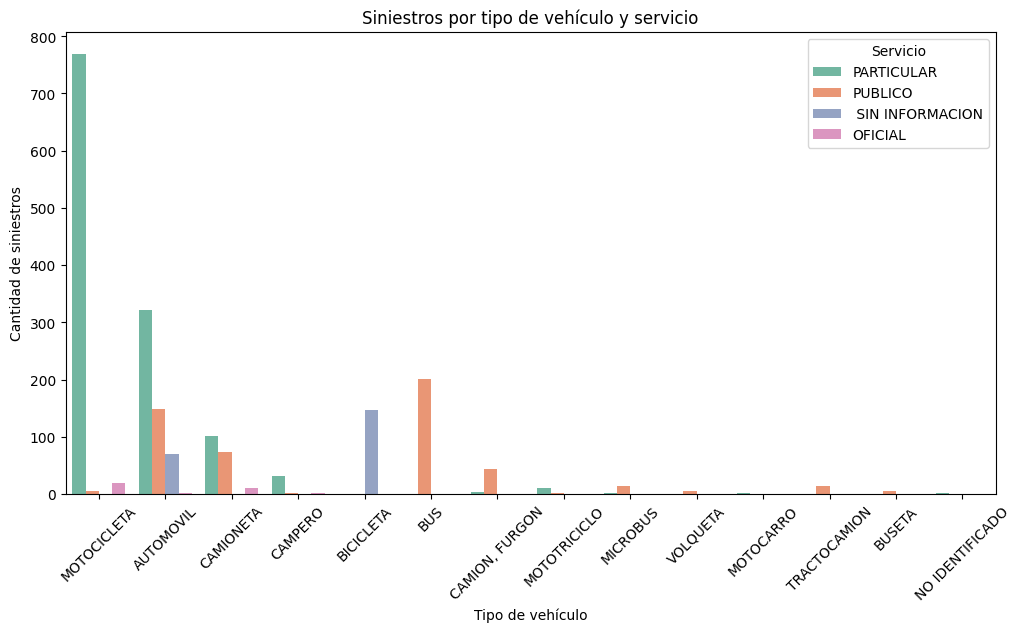

In [140]:
# Gráfica de barras agrupadas
plt.figure(figsize=(12, 6))
sb.countplot(data=vehiculo_data, x='CLASE', hue='SERVICIO', palette='Set2')
plt.title('Siniestros por tipo de vehículo y servicio')
plt.xlabel('Tipo de vehículo')
plt.ylabel('Cantidad de siniestros')
plt.xticks(rotation=45)
plt.legend(title='Servicio')
plt.show()

Entre las caracterizticas de la via resaltan en la mayoria de 

C:\Users\laura\AppData\Local\Temp\ipykernel_8120\1571307550.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=geom_counts.index, y=geom_counts.values, palette='viridis', ax=axes[0, 0])
C:\Users\laura\AppData\Local\Temp\ipykernel_8120\1571307550.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=geomb_counts.index, y=geomb_counts.values, palette='viridis', ax=axes[0, 1])
C:\Users\laura\AppData\Local\Temp\ipykernel_8120\1571307550.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=geomc_counts.index, y=geomc_counts.values, palette='vi

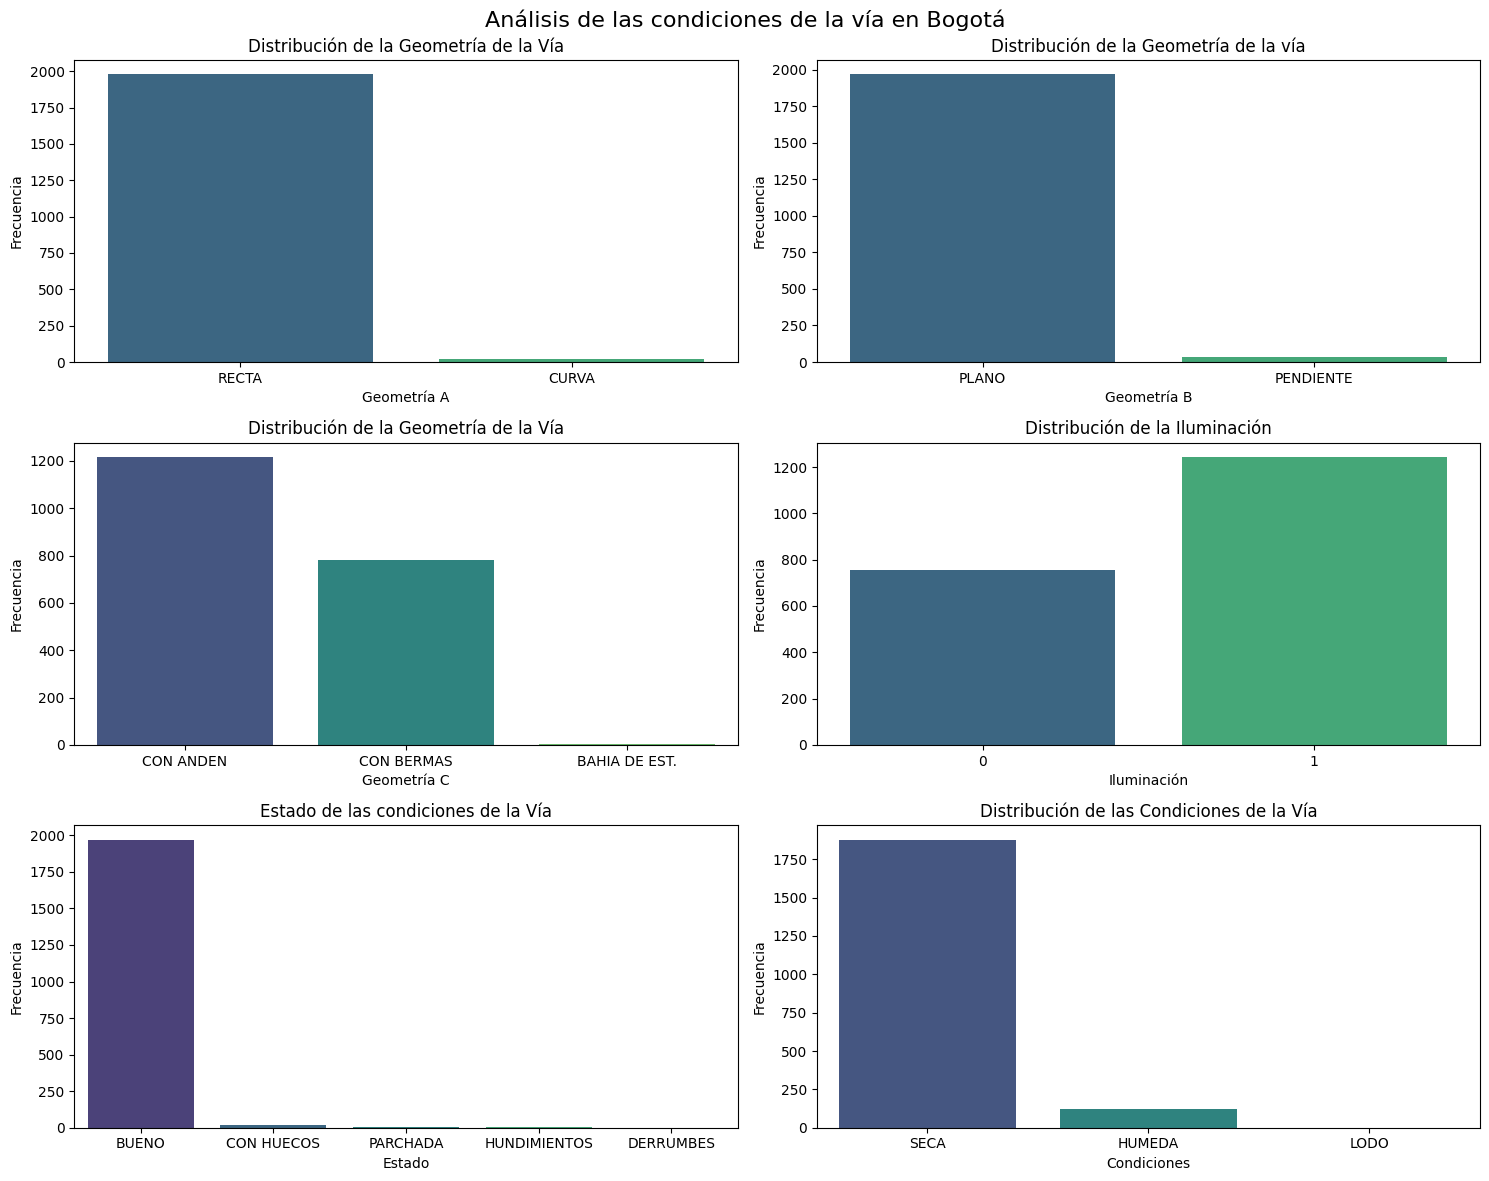

In [141]:
# Crear una figura con subgráficos
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 3 filas, 2 columnas
fig.suptitle('Análisis de las condiciones de la vía en Bogotá', fontsize=16)

# Gráfica 1: Distribución de la geometría de la vía (GEOMETRICA_A)
geom_counts = via_data['GEOMETRICA_A'].value_counts()
sb.barplot(x=geom_counts.index, y=geom_counts.values, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de la Geometría de la Vía')
axes[0, 0].set_xlabel('Geometría A')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfica 2: Distribución del estado de la vía (ESTADO)
geomb_counts = via_data['GEOMETRICA_B'].value_counts()
sb.barplot(x=geomb_counts.index, y=geomb_counts.values, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de la Geometría de la vía')
axes[0, 1].set_xlabel('Geometría B')
axes[0, 1].set_ylabel('Frecuencia')

# Gráfica 3: Distribución de las condiciones de la vía (CONDICIONES)
geomc_counts = via_data['GEOMETRICA_C'].value_counts()
sb.barplot(x=geomc_counts.index, y=geomc_counts.values, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Distribución de la Geometría de la Vía')
axes[1, 0].set_xlabel('Geometría C')
axes[1, 0].set_ylabel('Frecuencia')

# Gráfica 4: Distribución de la iluminación (ILUMINACION_A)
ilum_counts = via_data['ILUMINACION'].value_counts()
sb.barplot(x=ilum_counts.index, y=ilum_counts.values, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de la Iluminación')
axes[1, 1].set_xlabel('Iluminación')
axes[1, 1].set_ylabel('Frecuencia')

# Gráfica 5: Distribución de la iluminación (ILUMINACION_A)
estado_counts = via_data['ESTADO'].value_counts()
sb.barplot(x=estado_counts.index, y=estado_counts.values, palette='viridis', ax=axes[2, 0])
axes[2, 0].set_title('Estado de las condiciones de la Vía')
axes[2, 0].set_xlabel('Estado')
axes[2, 0].set_ylabel('Frecuencia')

# Gráfica 6: Distribución de las condiciones de la vía (CONDICIONES)
cond_counts = via_data['CONDICIONES'].value_counts()
sb.barplot(x=cond_counts.index, y=cond_counts.values, palette='viridis', ax=axes[2, 1])
axes[2, 1].set_title('Distribución de las Condiciones de la Vía')
axes[2, 1].set_xlabel('Condiciones')
axes[2, 1].set_ylabel('Frecuencia')

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

Con las graficas anteriores buscamos encontrar las características que priman entre los registros, con lo anterior es fácil ver que la mayoria de siniestros registrados suceden en una vía recta, plana, con buena iluminación, estado de la vía buena y seca.(*Cuando se establece que la vía se encuentra en buen estado nos referimos a que no presenta huecos, hundimientos, derrumbes o esta perchada*)  
Adicional el $74.8\%$ de los siniestros suceden en vías de una calzada de los cuales aproximadamente el $45.5\%$ son vías de dos carriles.

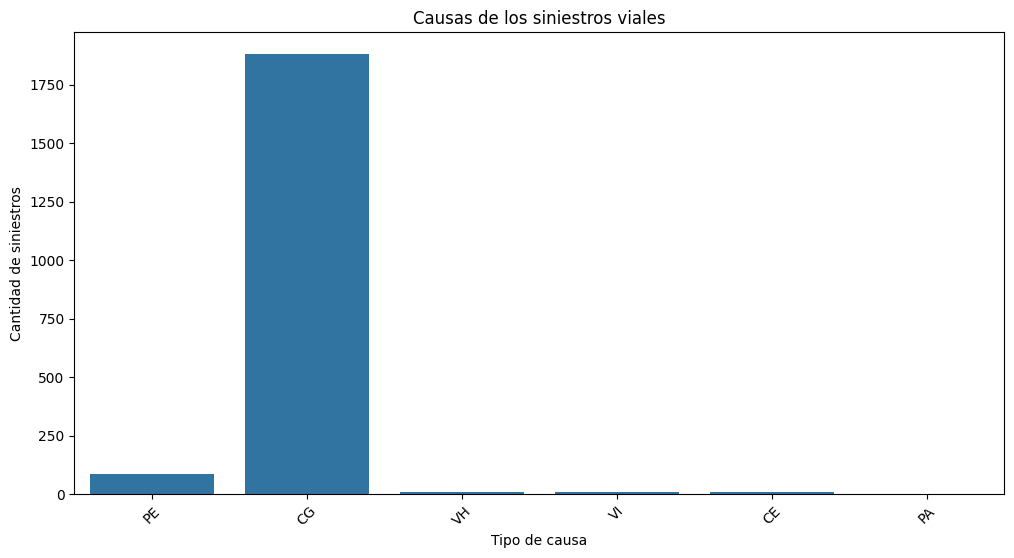

In [142]:
# Gráfica de barras agrupadas
plt.figure(figsize=(12, 6))
sb.countplot(data=causa_data, x='TIPO')
plt.title('Causas de los siniestros viales')
plt.xlabel('Tipo de causa')
plt.ylabel('Cantidad de siniestros')
plt.xticks(rotation=45)
plt.show()

__pendiente__. Aun no tenemos claro el significado de las siglas.

C:\Users\laura\AppData\Local\Temp\ipykernel_8120\1182224076.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=geom_counts.index, y=geom_counts.values, palette='viridis', ax=axes[0, 0])
C:\Users\laura\AppData\Local\Temp\ipykernel_8120\1182224076.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=geom_counts.index, y=geom_counts.values, palette='viridis', ax=axes[1, 0])
C:\Users\laura\AppData\Local\Temp\ipykernel_8120\1182224076.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=geom_counts.index, y=geom_counts.values, palette='viridi

Text(0, 0.5, 'Frecuencia')

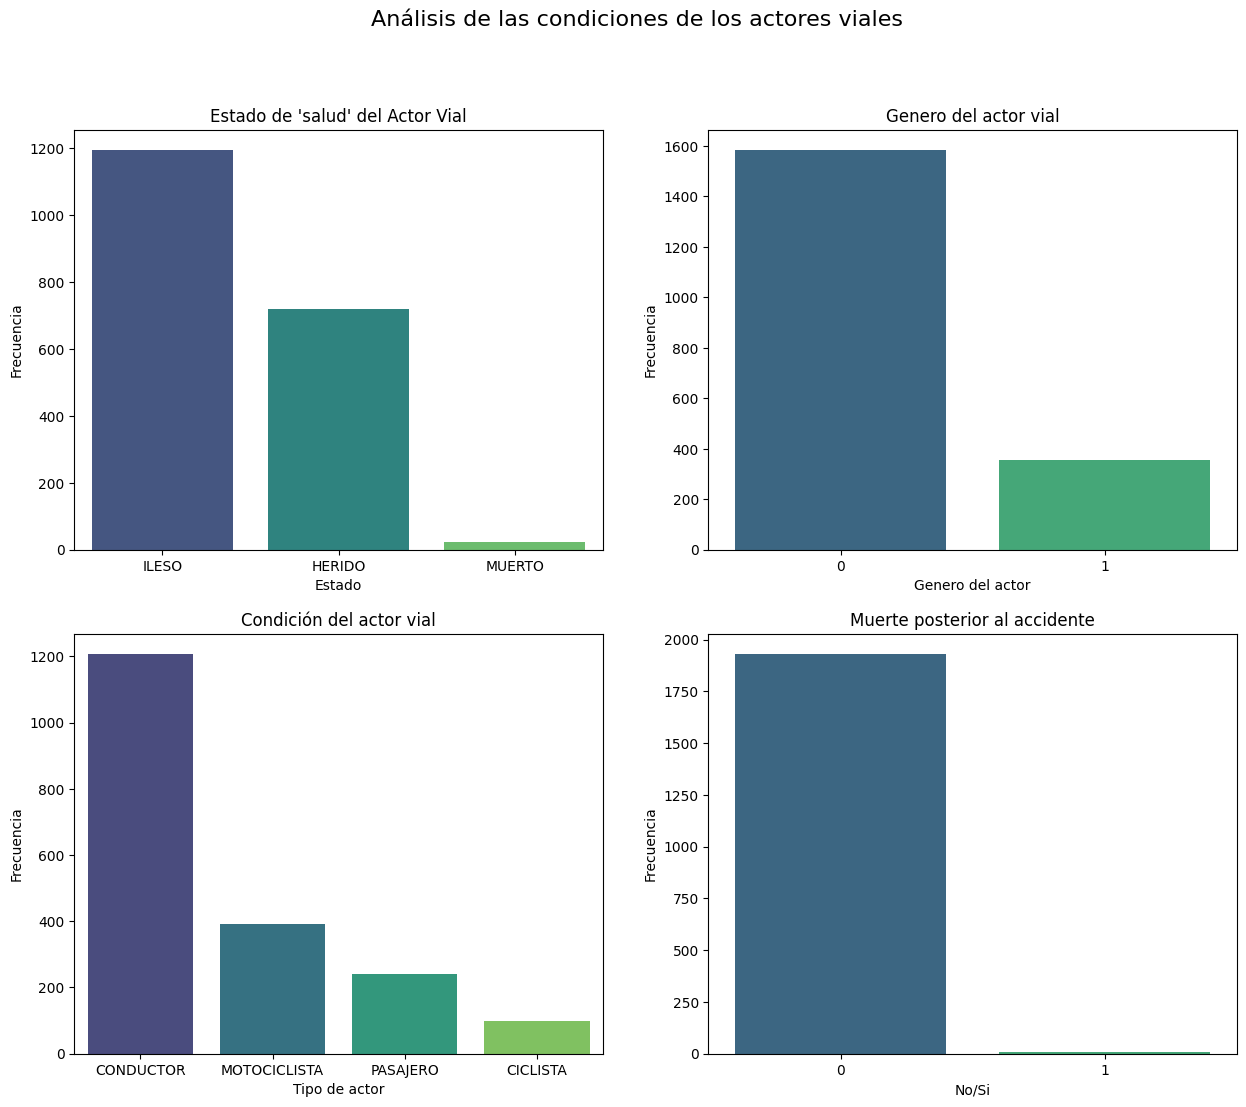

In [143]:
# Crear una figura con subgráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 3 filas, 2 columnas
fig.suptitle('Análisis de las condiciones de los actores viales', fontsize=16)

# Gráfica 1: Frecuencia y distribución del estado del actor vial (ESTADO)
geom_counts = actor_data['ESTADO'].value_counts()
sb.barplot(x=geom_counts.index, y=geom_counts.values, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Estado de \'salud\' del Actor Vial')
axes[0, 0].set_xlabel('Estado')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfica 1: Distribución de la condición del actor involucrado (CONDICION)
geom_counts = actor_data['CONDICION'].value_counts()
sb.barplot(x=geom_counts.index, y=geom_counts.values, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Condición del actor vial')
axes[1, 0].set_xlabel('Tipo de actor')
axes[1, 0].set_ylabel('Frecuencia')

# Gráfica 1: Distribución del genero del actor vial (GENERO)
geom_counts = actor_data['GENERO'].value_counts()
sb.barplot(x=geom_counts.index, y=geom_counts.values, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Genero del actor vial')
axes[0, 1].set_xlabel('Genero del actor')
axes[0, 1].set_ylabel('Frecuencia')

# Gráfica 1: Distribución de la edad del actor vial (MUERTE_POSTERIOR)
geom_counts = actor_data['MUERTE_POSTERIOR'].value_counts()
sb.barplot(x=geom_counts.index, y=geom_counts.values, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Muerte posterior al accidente')
axes[1, 1].set_xlabel('No/Si')
axes[1, 1].set_ylabel('Frecuencia')

De las graficas anteriores podemos intuir algunos resultados que nos permiten afirmar lo siguiente:  
- El __0.36%__ de las personas involucradas en siniestros viales en bogotá mueren posterior al accidente.  
- El __62%__ de los actores de siniestro viales son conductores, seguidos con un __20.1%__ motociclistas.
- Solamente el __1.13%__ de los actores involucrados en el siniestro mueren, priman con el __61.6%__ actores ilesos y el __37.1%__ resultan heridos.  
- En promedio los actores viales rondan entre la edad de __36__ y __37__ años.
- En el __81.7%__ de siniestros ocurridos en la ciudad de bogotá los hombres son actores.


In [144]:
# Calcular el porcentaje de cada valor en cada columna
for columna in actor_data.columns:
    if columna != 'FORMULARIO':
        print(f"\nPorcentajes para la columna {columna}:")
        porcentajes = actor_data[columna].value_counts(normalize=True) * 100
        print(porcentajes)
    else:
        pass



Porcentajes para la columna CONDICION:
CONDICION
CONDUCTOR       62.300155
MOTOCICLISTA    20.165034
PASAJERO        12.429087
CICLISTA         5.105725
Name: proportion, dtype: float64

Porcentajes para la columna ESTADO:
ESTADO
ILESO     61.681279
HERIDO    37.184116
MUERTO     1.134605
Name: proportion, dtype: float64

Porcentajes para la columna EDAD:
EDAD
32.0    3.661681
28.0    3.610108
27.0    3.558535
24.0    3.352243
31.0    3.249097
          ...   
1.0     0.051573
6.0     0.051573
74.0    0.051573
72.0    0.051573
91.0    0.051573
Name: proportion, Length: 78, dtype: float64

Porcentajes para la columna GENERO:
GENERO
0    81.743167
1    18.256833
Name: proportion, dtype: float64

Porcentajes para la columna MUERTE_POSTERIOR:
MUERTE_POSTERIOR
0    99.638989
1     0.361011
Name: proportion, dtype: float64


In [145]:
# Edad promedio de los actores involucrados en accidentes
actor_data.EDAD.mean()

np.float64(36.629190304280556)

Adicionalmente, nos interesa ver más a profundidad como estos valores se correlacionan con la tabla principal __ACCIDENTES__, la cual nos muestra la siguiente informaciónr elevante.

Los Accidentes a lo largo de los años se encuentran distribuidos de la siguiente manera, donde se concentran la mayoria de siniestros en el año 2022.

array([[<Axes: title={'center': 'ANO_OCURRENCIA_ACC'}>]], dtype=object)

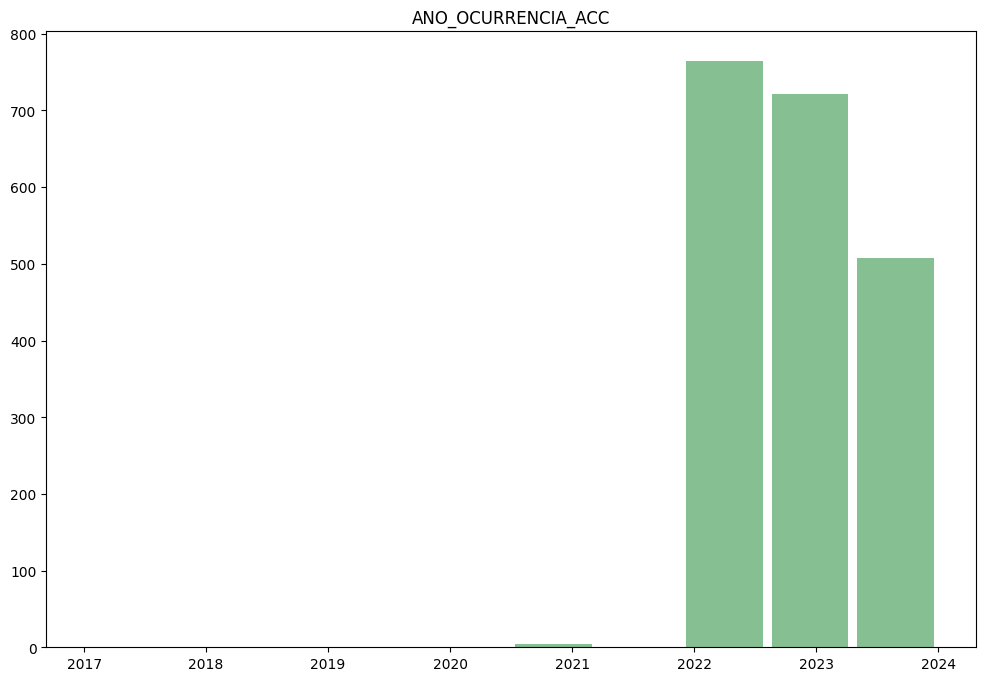

In [146]:
accidentes_data.hist(column='ANO_OCURRENCIA_ACC', bins=10, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

Los siguientes mapas nos muestran la distribución de los accidentes en bogotá catalogandolas por clase y gravedad.  
De estas aunque resulta complicado ver la acumulación de accidentes por zonas por la cantidad de resgistros *-se requeriria un análisis mas detallado por mes o año para observar-* podemos ver una generalidad de la cantidad de accidentes que ocurren en la ciudad de bogotá y el 76.5% de estos son choques donde priman los heridos. 

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

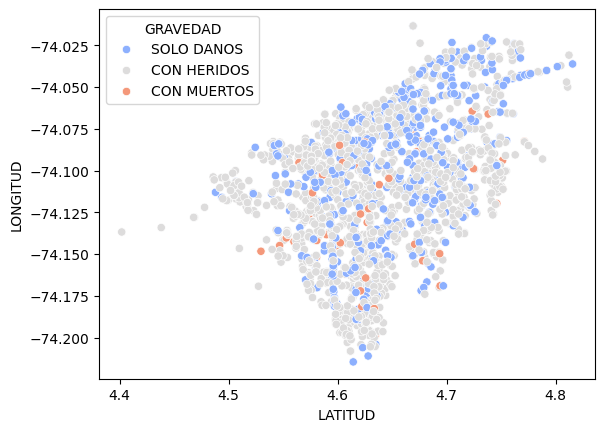

In [147]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data, hue = "GRAVEDAD", palette = "coolwarm")

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

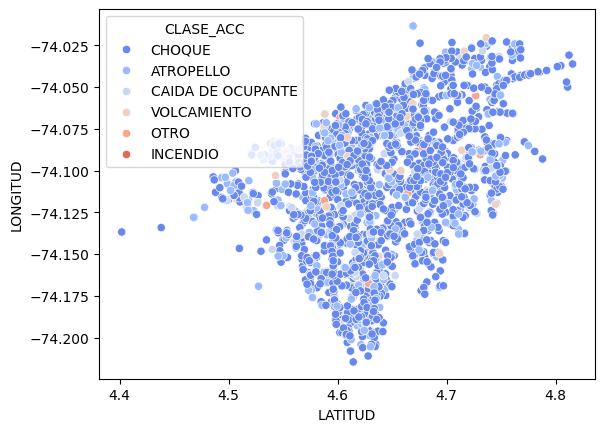

In [148]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data, hue = "CLASE_ACC", palette = "coolwarm")

Un ejemplo de lo mencionado anteriormente sucede cuando consideramos solamente los registros obtenidos en el año 2023, a partir de la grafica se pueden ver localidades con acumulaciones de accidentes y adicional se puede mencionar que en su mayoria son choques o atropellos y la mayoria de estos resultan siendo siniestros con heridos.

<Axes: xlabel='LONGITUD', ylabel='LATITUD'>

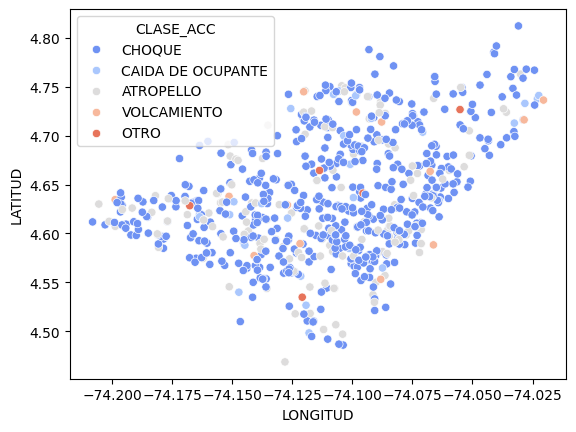

In [149]:
sb.scatterplot(x = "LONGITUD", y = "LATITUD", data = accidentes_data.query('ANO_OCURRENCIA_ACC == 2023'), hue = "CLASE_ACC", palette = "coolwarm")

<Axes: xlabel='LONGITUD', ylabel='LATITUD'>

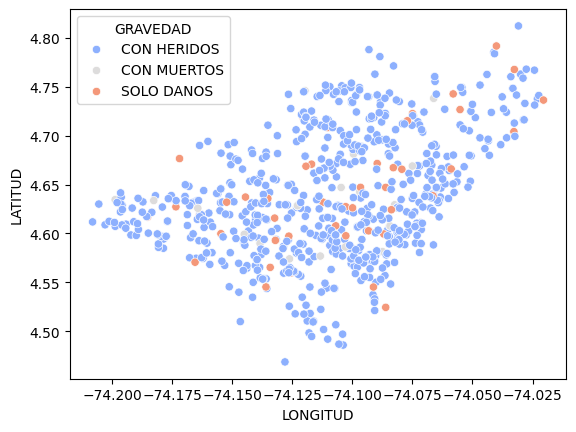

In [150]:
sb.scatterplot(x = "LONGITUD", y = "LATITUD", data = accidentes_data.query('ANO_OCURRENCIA_ACC == 2023'), hue = "GRAVEDAD", palette = "coolwarm")

----
### __Análisis de regresión lineal__

----
### __Análisis de componentes principales__

En esta sección, nuestro objetivo viene siendo identificar aquellos atributos en las distintas capas de la base de datos, para ver el grado de incidencia de cada atributo en el número de siniestros anuales y poder reducir la dimensionalidad de los datos para futuras implementaciones.

Para esto nos resulta util trabajar sobre registros completos, es decir, aquellos formularios cuyo identificador esta en todas las capas.  


*(Esto nos presento un incoveniente ya que al intentar hacer un join de mas de tres data sets sobre el atributo __FORMULARIO__ no retornaba ningun registro, de modo que este análisis se realizara sobre pares y adicional la perdida de información en cuanto a cantidad resulta siendo demasiado alta considerando que en ciertos casos al hacer el __join__ necesario temrinamos con datasets de hasta 8 o 0 registros)*

#### Siniestros en Bogotá y actores viales

En esta sección nos centraremos en hacer un análisis de componentes principales a la unión del data set accidentes y actores viales mediante un inner join, eliminamos duplicados y trabajamos sobre los registros restantes.

In [151]:
acc_act = pd.merge(accidentes_data, actor_data, on='FORMULARIO', how='inner')
acc_act.drop(columns=['FORMULARIO'], inplace=True)
acc_act = acc_act.drop_duplicates()
acc_act

,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD,CONDICION,ESTADO,EDAD,GENERO,MUERTE_POSTERIOR
0,1652418000000,09:38:00,2022.0,MAYO,VIERNES,AU NORTE - CL 174 B 02,SOLO DANOS,CHOQUE,USAQUEN,4.755,-74.046,CONDUCTOR,ILESO,37.0,1,0
1,1652418000000,09:38:00,2022.0,MAYO,VIERNES,AU NORTE - CL 174 B 02,SOLO DANOS,CHOQUE,USAQUEN,4.755,-74.046,CONDUCTOR,ILESO,25.0,0,0
2,1652418000000,05:15:00,2022.0,MAYO,VIERNES,CL 49 S- KR 81 B 02,CON MUERTOS,CHOQUE,KENNEDY,4.621,-74.172,CONDUCTOR,ILESO,43.0,0,0
3,1652418000000,05:15:00,2022.0,MAYO,VIERNES,CL 49 S- KR 81 B 02,CON MUERTOS,CHOQUE,KENNEDY,4.621,-74.172,MOTOCICLISTA,HERIDO,24.0,0,0
4,1652418000000,05:15:00,2022.0,MAYO,VIERNES,CL 49 S- KR 81 B 02,CON MUERTOS,CHOQUE,KENNEDY,4.621,-74.172,PASAJERO,MUERTO,19.0,1,0
5,1652331600000,19:20:00,2022.0,MAYO,JUEVES,CL 69 BIS A - KR 69 02,SOLO DANOS,CHOQUE,ENGATIVA,4.679,-74.090,CONDUCTOR,ILESO,25.0,0,0
6,1652331600000,19:20:00,2022.0,MAYO,JUEVES,CL 69 BIS A - KR 69 02,SOLO DANOS,CHOQUE,ENGATIVA,4.679,-74.090,CONDUCTOR,ILESO,47.0,0,0
7,1652418000000,15:00:00,2022.0,MAYO,VIERNES,KR 72 Y BIS - CL 34 S 02,SOLO DANOS,CHOQUE,KENNEDY,4.617,-74.140,CONDUCTOR,ILESO,28.0,0,0
8,1652418000000,15:00:00,2022.0,MAYO,VIERNES,KR 72 Y BIS - CL 34 S 02,SOLO DANOS,CHOQUE,KENNEDY,4.617,-74.140,CONDUCTOR,ILESO,34.0,0,0


La tabla anterior contiene bastantes datos categoricos que resultan de nuetsra interes análisar por lo tanto trabajaremos sobre la frecuencia de los valores de cada atributo para obtener un valor numerico y realizar el análisis de componentes principales. Para esto diseñamos una tabla de frecuencia, teniendo en cuenta los siguientes atributos  __'GRAVEDAD', 'CLASE_ACC', 'LOCALIDAD', 'CONDICION', 'ESTADO', 'DIA_OCURRENCIA_ACC', 'MES_OCURRENCIA_ACC','GENERO','EDAD'__ y __'MUERTE_POSTERIOR'__

In [152]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Seleccionamos los atributos categóricos relevantes
categorical_columns = ['GRAVEDAD', 'CLASE_ACC', 'LOCALIDAD', 'CONDICION', 'ESTADO', 'DIA_OCURRENCIA_ACC', 'MES_OCURRENCIA_ACC']
numerical_columns = ['GENERO', 'EDAD', 'MUERTE_POSTERIOR']  # Variables numéricas

# Matriz de frecuencias para variables categóricas
frequency_matrix_categorical = pd.get_dummies(acc_act[categorical_columns])

# Combinar con variables numéricas
frequency_matrix = pd.concat([frequency_matrix_categorical, acc_act[numerical_columns]], axis=1)

# Normalización de los datos
scaler = StandardScaler()
frequency_matrix_scaled = scaler.fit_transform(frequency_matrix)

# Convertir a DataFrame para conservar los nombres de las columnas
frequency_matrix_scaled = pd.DataFrame(frequency_matrix_scaled, columns=frequency_matrix.columns)

# Mostrar la matriz de frecuencias normalizada
print("Matriz de frecuencias normalizada:")
frequency_matrix_scaled

Matriz de frecuencias normalizada:


,GRAVEDAD_CON MUERTOS,GRAVEDAD_SOLO DANOS,CLASE_ACC_CHOQUE,LOCALIDAD_ENGATIVA,LOCALIDAD_KENNEDY,LOCALIDAD_USAQUEN,CONDICION_CONDUCTOR,CONDICION_MOTOCICLISTA,CONDICION_PASAJERO,ESTADO_HERIDO,ESTADO_ILESO,ESTADO_MUERTO,DIA_OCURRENCIA_ACC_JUEVES,DIA_OCURRENCIA_ACC_VIERNES,MES_OCURRENCIA_ACC_MAYO,GENERO,EDAD,MUERTE_POSTERIOR
0,-0.707107,0.707107,0.0,-0.534522,-1.118034,1.870829,0.534522,-0.353553,-0.353553,-0.353553,0.534522,-0.353553,-0.534522,0.534522,0.0,1.870829,0.634434,0.0
1,-0.707107,0.707107,0.0,-0.534522,-1.118034,1.870829,0.534522,-0.353553,-0.353553,-0.353553,0.534522,-0.353553,-0.534522,0.534522,0.0,-0.534522,-0.709074,0.0
2,1.414214,-1.414214,0.0,-0.534522,0.894427,-0.534522,0.534522,-0.353553,-0.353553,-0.353553,0.534522,-0.353553,-0.534522,0.534522,0.0,-0.534522,1.306188,0.0
3,1.414214,-1.414214,0.0,-0.534522,0.894427,-0.534522,-1.870829,2.828427,-0.353553,2.828427,-1.870829,-0.353553,-0.534522,0.534522,0.0,-0.534522,-0.821033,0.0
4,1.414214,-1.414214,0.0,-0.534522,0.894427,-0.534522,-1.870829,-0.353553,2.828427,-0.353553,-1.870829,2.828427,-0.534522,0.534522,0.0,1.870829,-1.380828,0.0
5,-0.707107,0.707107,0.0,1.870829,-1.118034,-0.534522,0.534522,-0.353553,-0.353553,-0.353553,0.534522,-0.353553,1.870829,-1.870829,0.0,-0.534522,-0.709074,0.0
6,-0.707107,0.707107,0.0,1.870829,-1.118034,-0.534522,0.534522,-0.353553,-0.353553,-0.353553,0.534522,-0.353553,1.870829,-1.870829,0.0,-0.534522,1.754024,0.0
7,-0.707107,0.707107,0.0,-0.534522,0.894427,-0.534522,0.534522,-0.353553,-0.353553,-0.353553,0.534522,-0.353553,-0.534522,0.534522,0.0,-0.534522,-0.373197,0.0
8,-0.707107,0.707107,0.0,-0.534522,0.894427,-0.534522,0.534522,-0.353553,-0.353553,-0.353553,0.534522,-0.353553,-0.534522,0.534522,0.0,-0.534522,0.298557,0.0


In [153]:
def Tabular_corr_matrix(corr_mat):
    '''
    Esta función presenta en forma tabular
    la correlación entre pares de columnas eliminando los
    pares iguales
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','correlación']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat = corr_mat.sort_values('correlación', ascending=False)

    return(corr_mat)

corr_matrix = frequency_matrix_scaled.select_dtypes(include=['number']).corr(method='pearson')
Tabular_corr_matrix(corr_matrix)

,variable_1,variable_2,correlación
84,CONDICION_CONDUCTOR,ESTADO_ILESO,1.0
41,LOCALIDAD_ENGATIVA,DIA_OCURRENCIA_ACC_JUEVES,1.0
126,ESTADO_HERIDO,CONDICION_MOTOCICLISTA,1.0
140,ESTADO_ILESO,CONDICION_CONDUCTOR,1.0
157,ESTADO_MUERTO,CONDICION_PASAJERO,1.0
...,...,...,...
15,GRAVEDAD_SOLO DANOS,GRAVEDAD_CON MUERTOS,-1.0
42,LOCALIDAD_ENGATIVA,DIA_OCURRENCIA_ACC_VIERNES,-1.0
177,DIA_OCURRENCIA_ACC_JUEVES,DIA_OCURRENCIA_ACC_VIERNES,-1.0
182,DIA_OCURRENCIA_ACC_VIERNES,LOCALIDAD_ENGATIVA,-1.0


Anteriormente mostramos la tabla con los coeficientes de correlación entre cada par de variables, la siguiente grafica corresponde a una grafica de calor de los coeficientes de correlación, en esta hay algunas relaciones que resultan faciles de asimilar por ejemplo si tenemos en cuenta la *CONDICION_PASAJERO* y el *ESTADO_MUERTO*, aunque *ESTADO_MUERTO* no especifica sobre que actor actua resultan totalmente correlacionadas ya que la gravedad de su condición tambien define su estado.  

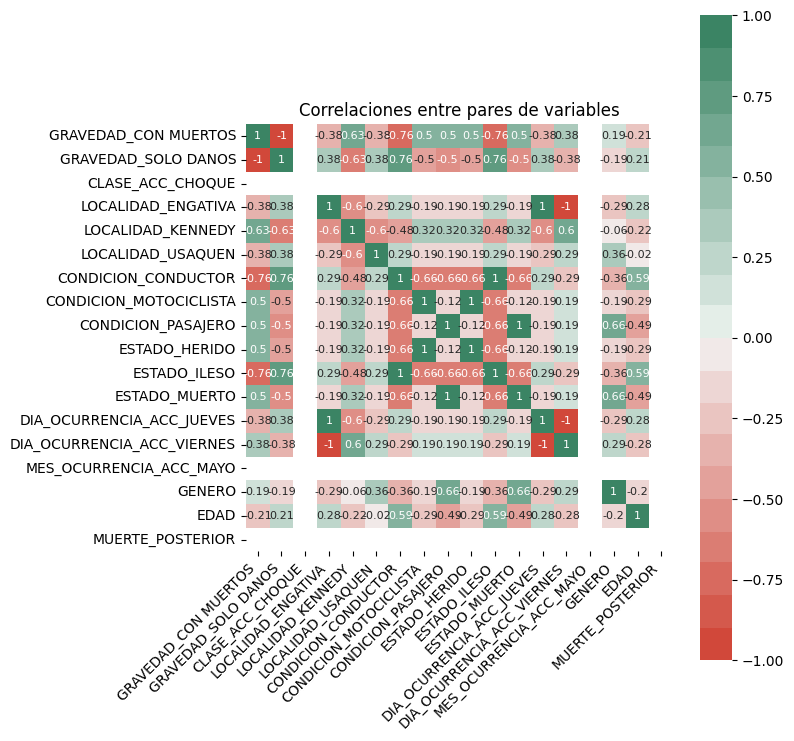

In [154]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sb.heatmap(
    corr_matrix,
    annot=True,
    cbar=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sb.diverging_palette(15, 150, n=20),
    square=True,
    ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)

ax.tick_params(labelsize=10)
ax.set_title("Correlaciones entre pares de variables")
plt.tight_layout()
plt.show()

In [155]:
# Aplicar PCA reduciendo a dos componentes principales
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(frequency_matrix_scaled)

Las primeras dos componentes nos representarian aproximadamente el 64% de la información total

In [156]:
pca.explained_variance_ratio_

array([0.44577946, 0.18956681])

In [157]:
pca.explained_variance_ratio_.sum()

np.float64(0.6353462671475901)

En la siguiente figura podremos ver graficamente la proporción de la varianza total en el conjunto de datos original explicada por cada componente principal.

C:\Users\laura\AppData\Local\Temp\ipykernel_8120\132107377.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=[f"PC{i+1}" for i in range(2)], y=pca.explained_variance_ratio_, palette='viridis')


<Axes: >

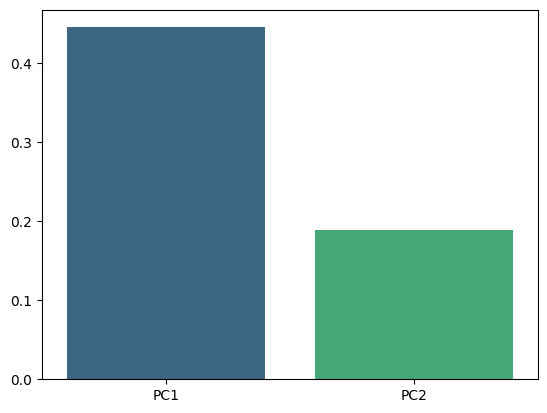

In [158]:
sb.barplot(x=[f"PC{i+1}" for i in range(2)], y=pca.explained_variance_ratio_, palette='viridis')

La siguiente grafica nos muestra la dispersión de los datos basado en la frecuencia de atributos en las dos primeras componentes principales, como se podrá notar no se dispone de una cantidad significativa de información para armar conjetura alguna más que la visualización de esta dispersión.

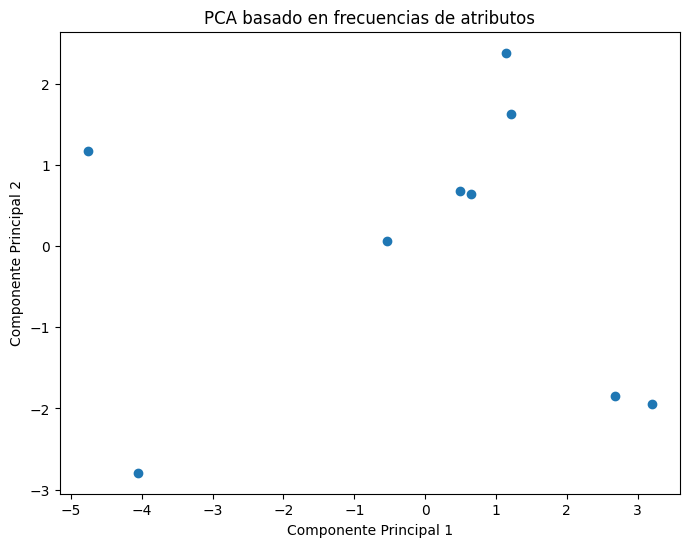

Contribución de cada atributo a los componentes principales:
GRAVEDAD_CON MUERTOS: PC1=-0.33, PC2=-0.13
GRAVEDAD_SOLO DANOS: PC1=0.33, PC2=0.13
CLASE_ACC_CHOQUE: PC1=-0.00, PC2=0.00
LOCALIDAD_ENGATIVA: PC1=0.23, PC2=-0.36
LOCALIDAD_KENNEDY: PC1=-0.27, PC2=-0.02
LOCALIDAD_USAQUEN: PC1=0.09, PC2=0.38
CONDICION_CONDUCTOR: PC1=0.35, PC2=0.15
CONDICION_MOTOCICLISTA: PC1=-0.21, PC2=-0.35
CONDICION_PASAJERO: PC1=-0.25, PC2=0.15
ESTADO_HERIDO: PC1=-0.21, PC2=-0.35
ESTADO_ILESO: PC1=0.35, PC2=0.15
ESTADO_MUERTO: PC1=-0.25, PC2=0.15
DIA_OCURRENCIA_ACC_JUEVES: PC1=0.23, PC2=-0.36
DIA_OCURRENCIA_ACC_VIERNES: PC1=-0.23, PC2=0.36
MES_OCURRENCIA_ACC_MAYO: PC1=-0.00, PC2=0.00
GENERO: PC1=-0.14, PC2=0.33
EDAD: PC1=0.21, PC2=-0.04
MUERTE_POSTERIOR: PC1=-0.00, PC2=0.00


In [159]:
# Visualización de los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA basado en frecuencias de atributos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Interpretación de los componentes principales
print("Contribución de cada atributo a los componentes principales:")
for i, column in enumerate(frequency_matrix.columns):
    print(f"{column}: PC1={pca.components_[0][i]:.2f}, PC2={pca.components_[1][i]:.2f}")

De igual forma podriamos ver la contribución de cada atributo a cada componente principal y adicional podremos ver cuánta información captura cada componente principal y cuántos componentes necesitamos para representar adecuadamente los datos de siniestrialidad en la Bogotá. En este caso los primeros tres componentes (PC1, PC2 y PC3) capturan el 82% de la variabilidad, lo que sugiere que son suficientes para la mayoría de los análisis.

In [160]:
pca = PCA(n_components=5)  # cOnsideramos hasta 5 componentes principales
pca_result = pca.fit_transform(frequency_matrix_scaled)

print("Varianza por cada componente principal:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2f} ({var*100:.0f}%)")

Varianza por cada componente principal:
PC1: 0.45 (45%)
PC2: 0.19 (19%)
PC3: 0.18 (18%)
PC4: 0.10 (10%)
PC5: 0.06 (6%)


#### Siniestros en Bogotá y vehiculos involucrados


In [161]:
acc_veh = pd.merge(accidentes_data, vehiculo_data, on='FORMULARIO', how='inner')
acc_veh.drop(columns=['FORMULARIO'], inplace=True)
acc_veh = acc_veh.drop_duplicates()
acc_veh.head(5)

,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD,CLASE,SERVICIO
0,1702184400000,02:50:00,2023.0,DICIEMBRE,DOMINGO,CL 62 S- KR 20 C 02,CON HERIDOS,CHOQUE,CIUDAD BOLIVAR,4.564469,-74.143861,AUTOMOVIL,PUBLICO
1,1702184400000,02:50:00,2023.0,DICIEMBRE,DOMINGO,CL 62 S- KR 20 C 02,CON HERIDOS,CHOQUE,CIUDAD BOLIVAR,4.564469,-74.143861,MOTOCICLETA,PARTICULAR
2,1702184400000,00:33:00,2023.0,DICIEMBRE,DOMINGO,AV AVENIDA JORGE GAITAN CORTES - DG 68 B S 02,CON HERIDOS,CHOQUE,CIUDAD BOLIVAR,4.580365,-74.158372,MOTOCICLETA,PARTICULAR
3,1702184400000,00:33:00,2023.0,DICIEMBRE,DOMINGO,AV AVENIDA JORGE GAITAN CORTES - DG 68 B S 02,CON HERIDOS,CHOQUE,CIUDAD BOLIVAR,4.580365,-74.158372,AUTOMOVIL,PARTICULAR
4,1702184400000,00:33:00,2023.0,DICIEMBRE,DOMINGO,AV AVENIDA JORGE GAITAN CORTES - DG 68 B S 02,CON HERIDOS,CHOQUE,CIUDAD BOLIVAR,4.580365,-74.158372,AUTOMOVIL,SIN INFORMACION


La tabla anterior contiene bastantes datos categoricos que resultan de nuestro interes análisar por lo tanto trabajaremos sobre la frecuencia de los valores de cada atributo para obtener un valor numerico y realizar el análisis de componentes principales. Para esto diseñamos una tabla de frecuencia, teniendo en cuenta los siguientes atributos  __'DIA_OCURRENCIA_ACC', 'MES_OCURRENCIA_ACC','GRAVEDAD','CLASE_ACC','CLASE'__ y __'SERVICIO'__

In [162]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Seleccionamos los atributos categóricos relevantes
categorical_columns = ['DIA_OCURRENCIA_ACC', 'MES_OCURRENCIA_ACC', 'GRAVEDAD', 'CLASE_ACC', 'CLASE', 'SERVICIO']

# Matriz de frecuencias para variables categóricas
frequency_matrix_categorical = pd.get_dummies(acc_veh[categorical_columns])

# Normalización de los datos
scaler = StandardScaler()
frequency_matrix_scaled = scaler.fit_transform(frequency_matrix_categorical)

# Convertir a DataFrame para conservar los nombres de las columnas
frequency_matrix_scaled = pd.DataFrame(frequency_matrix_scaled, columns=frequency_matrix_categorical.columns)

# Mostrar la matriz de frecuencias normalizada
print("Matriz de frecuencias normalizada:")
frequency_matrix_scaled

Matriz de frecuencias normalizada:


,DIA_OCURRENCIA_ACC_DOMINGO,DIA_OCURRENCIA_ACC_JUEVES,DIA_OCURRENCIA_ACC_LUNES,DIA_OCURRENCIA_ACC_MARTES,DIA_OCURRENCIA_ACC_MIERCOLES,DIA_OCURRENCIA_ACC_SABADO,DIA_OCURRENCIA_ACC_VIERNES,MES_OCURRENCIA_ACC_DICIEMBRE,MES_OCURRENCIA_ACC_ENERO,MES_OCURRENCIA_ACC_FEBRERO,...,CLASE_BUS,"CLASE_CAMION, FURGON",CLASE_CAMIONETA,CLASE_CAMPERO,CLASE_MOTOCICLETA,CLASE_MOTOTRICICLO,SERVICIO_ SIN INFORMACION,SERVICIO_OFICIAL,SERVICIO_PARTICULAR,SERVICIO_PUBLICO
0,1.978141,-0.344691,-0.236801,-0.344691,-0.360555,-0.533002,-0.491689,1.876166,-0.134231,-0.134231,...,-0.294174,-0.134231,-0.328395,-0.134231,-0.798549,-0.094491,-0.406138,-0.191565,-1.206864,1.829250
1,1.978141,-0.344691,-0.236801,-0.344691,-0.360555,-0.533002,-0.491689,1.876166,-0.134231,-0.134231,...,-0.294174,-0.134231,-0.328395,-0.134231,1.252271,-0.094491,-0.406138,-0.191565,0.828593,-0.546672
2,1.978141,-0.344691,-0.236801,-0.344691,-0.360555,-0.533002,-0.491689,1.876166,-0.134231,-0.134231,...,-0.294174,-0.134231,-0.328395,-0.134231,1.252271,-0.094491,-0.406138,-0.191565,0.828593,-0.546672
3,1.978141,-0.344691,-0.236801,-0.344691,-0.360555,-0.533002,-0.491689,1.876166,-0.134231,-0.134231,...,-0.294174,-0.134231,-0.328395,-0.134231,-0.798549,-0.094491,-0.406138,-0.191565,0.828593,-0.546672
4,1.978141,-0.344691,-0.236801,-0.344691,-0.360555,-0.533002,-0.491689,1.876166,-0.134231,-0.134231,...,-0.294174,-0.134231,-0.328395,-0.134231,-0.798549,-0.094491,2.462214,-0.191565,-1.206864,-0.546672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,-0.505525,-0.344691,-0.236801,-0.344691,2.773501,-0.533002,-0.491689,-0.533002,-0.134231,-0.134231,...,-0.294174,-0.134231,-0.328395,-0.134231,-0.798549,-0.094491,-0.406138,-0.191565,0.828593,-0.546672
109,-0.505525,-0.344691,-0.236801,-0.344691,2.773501,-0.533002,-0.491689,-0.533002,-0.134231,-0.134231,...,-0.294174,-0.134231,-0.328395,-0.134231,-0.798549,-0.094491,-0.406138,-0.191565,-1.206864,1.829250
110,-0.505525,-0.344691,-0.236801,-0.344691,-0.360555,1.876166,-0.491689,-0.533002,-0.134231,-0.134231,...,-0.294174,-0.134231,-0.328395,-0.134231,1.252271,-0.094491,-0.406138,-0.191565,0.828593,-0.546672
111,-0.505525,-0.344691,4.222953,-0.344691,-0.360555,-0.533002,-0.491689,-0.533002,-0.134231,-0.134231,...,-0.294174,-0.134231,-0.328395,-0.134231,-0.798549,-0.094491,2.462214,-0.191565,-1.206864,-0.546672


Mostramos a continuación la tabla con los coeficinetes de correlación entre cada par de variables con la grafica de calor de los coeficientes de correlación, en esta hay algunas relaciones que resultan faciles de asimilar sin embargo resultan tambien otras las cuales no resultan con sentido como las relaciones con el atributo *SERVICIO_SIN INFORMACION* la cual debio haberse omitido en la depuración dada la cantidad de alias que se usan para omitir información. 

In [163]:
def Tabular_corr_matrix(corr_mat):
    '''
    Esta función presenta en forma tabular
    la correlación entre pares de columnas eliminando los
    pares iguales
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','correlación']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat = corr_mat.sort_values('correlación', ascending=False)

    return(corr_mat)

corr_matrix = frequency_matrix_scaled.select_dtypes(include=['number']).corr(method='pearson')
Tabular_corr_matrix(corr_matrix)

,variable_1,variable_2,correlación
871,CLASE_BICICLETA,SERVICIO_ SIN INFORMACION,0.848703
1109,SERVICIO_ SIN INFORMACION,CLASE_BICICLETA,0.848703
224,DIA_OCURRENCIA_ACC_VIERNES,MES_OCURRENCIA_ACC_SEPTIEMBRE,0.561304
496,MES_OCURRENCIA_ACC_SEPTIEMBRE,DIA_OCURRENCIA_ACC_VIERNES,0.561304
186,DIA_OCURRENCIA_ACC_SABADO,MES_OCURRENCIA_ACC_MAYO,0.557256
...,...,...,...
1189,SERVICIO_PARTICULAR,SERVICIO_PUBLICO,-0.659759
542,GRAVEDAD_CON HERIDOS,GRAVEDAD_SOLO DANOS,-0.759980
610,GRAVEDAD_SOLO DANOS,GRAVEDAD_CON HERIDOS,-0.759980
718,CLASE_ACC_CHOQUE,CLASE_ACC_ATROPELLO,-0.773909


Seleccionamos los atributos que consideramos más relevantes y observamos el mapa de calor.

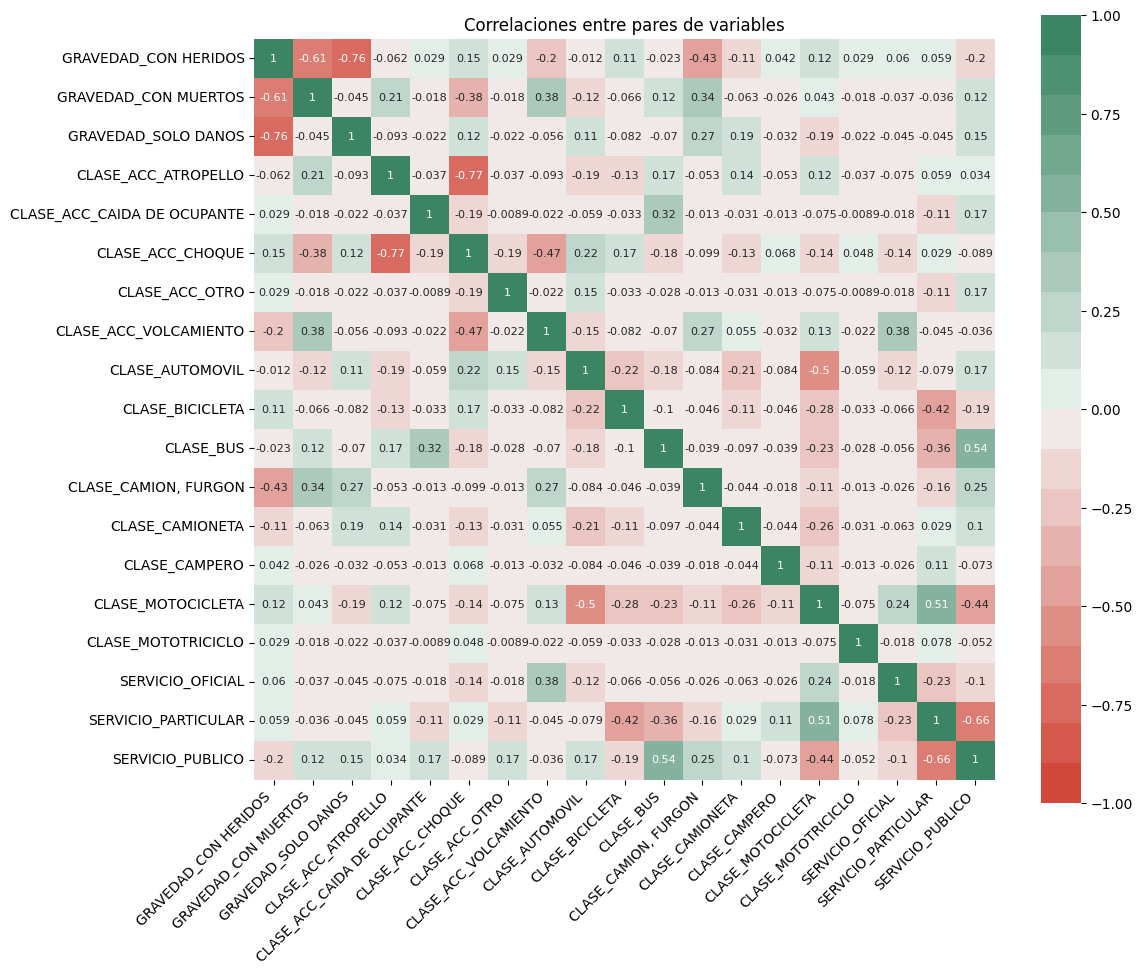

In [164]:
selected_columns = [
    # Gravedad
    'GRAVEDAD_CON HERIDOS', 'GRAVEDAD_CON MUERTOS', 'GRAVEDAD_SOLO DANOS',
    
    # Clase de accidente
    'CLASE_ACC_ATROPELLO', 'CLASE_ACC_CAIDA DE OCUPANTE', 'CLASE_ACC_CHOQUE',
    'CLASE_ACC_OTRO', 'CLASE_ACC_VOLCAMIENTO',
    
    # Tipo de vehículo
    'CLASE_AUTOMOVIL', 'CLASE_BICICLETA', 'CLASE_BUS', 'CLASE_CAMION, FURGON',
    'CLASE_CAMIONETA', 'CLASE_CAMPERO', 'CLASE_MOTOCICLETA', 'CLASE_MOTOTRICICLO',
    
    # Servicio del vehículo
    'SERVICIO_OFICIAL', 'SERVICIO_PARTICULAR', 'SERVICIO_PUBLICO'
]

# Crear una submatriz de correlación con los atributos seleccionados
corr_matrix = frequency_matrix_scaled[selected_columns].select_dtypes(include=['number']).corr(method='pearson')

# Configurar el gráfico
plt.figure(figsize=(12, 10))
sb.heatmap(
    corr_matrix,
    annot=True,
    cbar=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sb.diverging_palette(15, 150, n=20),
    square=True,
)

# Ajustar las etiquetas
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlaciones entre pares de variables")
plt.tight_layout()
plt.show()

In [165]:
# Aplicar PCA reduciendo a dos componentes principales
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(frequency_matrix_scaled)

Las primeras dos componentes nos representarian aproximadamente el 18% de la información total

In [166]:
pca.explained_variance_ratio_

array([0.09119995, 0.08456286])

In [167]:
pca.explained_variance_ratio_.sum()

np.float64(0.17576281189505918)

En la siguiente figura podremos ver graficamente la proporción de la varianza total en el conjunto de datos original explicada por cada componente principal.

C:\Users\laura\AppData\Local\Temp\ipykernel_8120\132107377.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=[f"PC{i+1}" for i in range(2)], y=pca.explained_variance_ratio_, palette='viridis')


<Axes: >

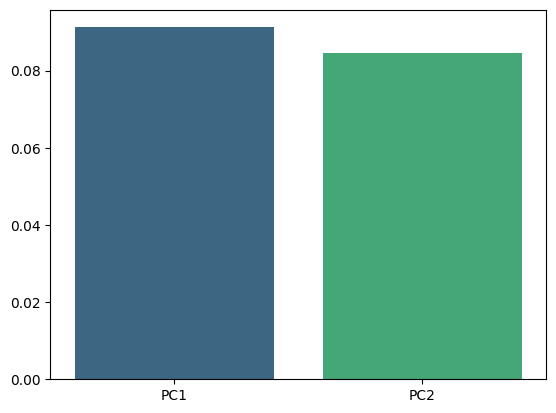

In [168]:
sb.barplot(x=[f"PC{i+1}" for i in range(2)], y=pca.explained_variance_ratio_, palette='viridis')

La siguiente grafica nos muestra la dispersión de los datos basado en la frecuencia de atributos en las dos primeras componentes principales, como se podrá notar no se dispone de una cantidad significativa de información para armar conjetura alguna más que la visualización de esta dispersión.

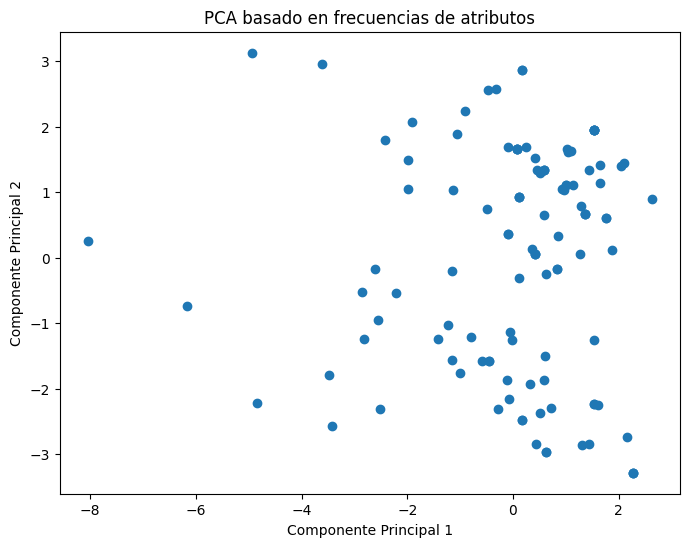

Contribución de cada atributo a los componentes principales:
GRAVEDAD_CON MUERTOS: PC1=-0.05, PC2=0.02
GRAVEDAD_SOLO DANOS: PC1=0.07, PC2=-0.08
CLASE_ACC_CHOQUE: PC1=-0.14, PC2=-0.06
LOCALIDAD_ENGATIVA: PC1=-0.15, PC2=0.11
LOCALIDAD_KENNEDY: PC1=-0.14, PC2=-0.12
LOCALIDAD_USAQUEN: PC1=0.13, PC2=0.15
CONDICION_CONDUCTOR: PC1=0.17, PC2=-0.07
CONDICION_MOTOCICLISTA: PC1=-0.09, PC2=-0.00
CONDICION_PASAJERO: PC1=0.02, PC2=-0.03
ESTADO_HERIDO: PC1=0.03, PC2=0.04
ESTADO_ILESO: PC1=-0.04, PC2=0.01
ESTADO_MUERTO: PC1=0.12, PC2=0.12
DIA_OCURRENCIA_ACC_JUEVES: PC1=0.11, PC2=0.04
DIA_OCURRENCIA_ACC_VIERNES: PC1=-0.16, PC2=-0.00
MES_OCURRENCIA_ACC_MAYO: PC1=0.14, PC2=-0.17
GENERO: PC1=0.41, PC2=0.03
EDAD: PC1=-0.34, PC2=0.09
MUERTE_POSTERIOR: PC1=-0.24, PC2=-0.11


In [169]:
# Visualización de los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA basado en frecuencias de atributos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Interpretación de los componentes principales
print("Contribución de cada atributo a los componentes principales:")
for i, column in enumerate(frequency_matrix.columns):
    print(f"{column}: PC1={pca.components_[0][i]:.2f}, PC2={pca.components_[1][i]:.2f}")

De igual forma podriamos ver la contribución de cada atributo a cada componente principal y adicional podremos ver cuánta información captura cada componente principal y cuántos componentes necesitamos para representar adecuadamente los datos de siniestrialidad en la Bogotá y la información vehicular. En este caso si consideramos las primeras cinco componentes solo capturariamos el 36% de la variabilidad, lo cual es insuficiente par ala mayoria de los análisis. De esta forma podriamos decir que la información de los vehiculos no nos provee mucha información en cuanto a la gravedad o la cantidad de siniestros en Bogotá, adicional a esto, tambien podriamos tener en cuenta la alta variabilidad vista en las graficas.

In [170]:
pca = PCA(n_components=5)  # cOnsideramos hasta 5 componentes principales
pca_result = pca.fit_transform(frequency_matrix_scaled)

print("Varianza por cada componente principal:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2f} ({var*100:.0f}%)")

Varianza por cada componente principal:
PC1: 0.09 (9%)
PC2: 0.08 (8%)
PC3: 0.07 (7%)
PC4: 0.06 (6%)
PC5: 0.06 (6%)


A continuación realizamos un análisis de las primeras tres componentes junto a su gráfica.

In [171]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(frequency_matrix_scaled)

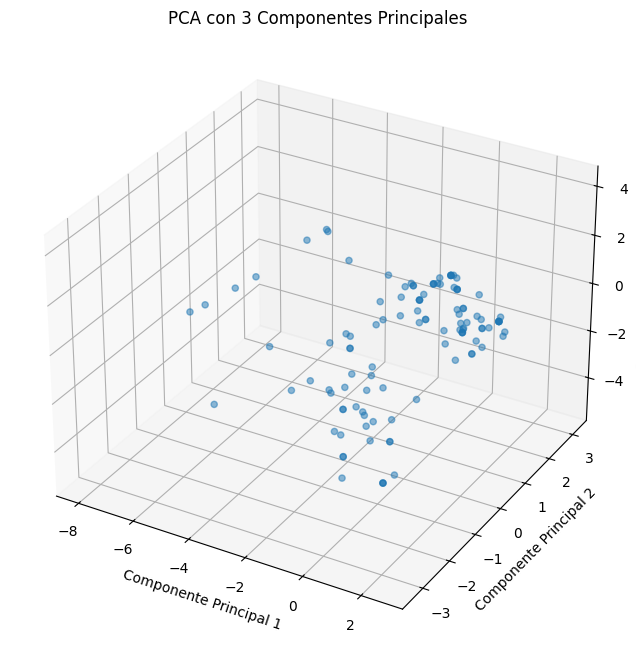

In [172]:
# Graficar los componentes principales en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2') 
ax.set_zlabel('Componente Principal 3')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)

ax.set_title("PCA con 3 Componentes Principales")
plt.show()

#### Siniestros en Bogotá, causas y condiciones de la vía

Como se puede observar no es posible realizar el análisis contemplado en los suguientes data sets considerando que su unión no nos brinda ninguna información como se puede ver a continuación.

In [173]:
acc_caus = pd.merge(accidentes_data, causa_data, on='FORMULARIO', how='inner')
acc_caus.drop(columns=['FORMULARIO'], inplace=True)
acc_caus = acc_caus.drop_duplicates()
acc_caus

,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD,NOMBRE,TIPO_CAUSA,TIPO


In [174]:
acc_via = pd.merge(accidentes_data, via_data, on='FORMULARIO', how='inner')
acc_via.drop(columns=['FORMULARIO'], inplace=True)
acc_via = acc_via.drop_duplicates()
acc_via

,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,...,GEOMETRICA_C,UTILIZACION,CALZADAS,CARRILES,MATERIAL,ESTADO,CONDICIONES,SEMAFORO,ILUMINACION,AGENTE_TRANSITO


#### Siniestros en Bogotá: Accidentalidad

Por ultimo en la sección de análisis de componentes principales. Considerando los resultados anteriores y la cantidad de registros perdidos, realizaremos el mismo anpalisis sobre la base de datos de __ACCIDENTES__ que nos proporciona información general de los siniestros en Bogotá.

In [175]:
accidentes_data = accidentes_data.drop_duplicates()
accidentes_data.head(5)

,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD
0,A001606763,1709787600000,08:00:00,2024.0,MARZO,JUEVES,KR 105 C - CL 66 02,SOLO DANOS,CHOQUE,ENGATIVA,4.699109,-74.124926
1,A001609376,1710565200000,01:30:00,2024.0,MARZO,SABADO,CL 26 S- KR 78 B 02,CON HERIDOS,ATROPELLO,KENNEDY,4.625398,-74.147784
2,A001609394,1710478800000,12:40:00,2024.0,MARZO,VIERNES,CL 71 B S- KR 16 C 02,CON HERIDOS,CHOQUE,CIUDAD BOLIVAR,4.544940,-74.136136
3,A001609496,1710478800000,10:30:00,2024.0,MARZO,VIERNES,DG 39 A S- KR 39 A 02,CON HERIDOS,CHOQUE,PUENTE ARANDA,4.594984,-74.123122
4,A001609304,1710478800000,09:16:00,2024.0,MARZO,VIERNES,KR 89 - CL 42 S 02,CON MUERTOS,CHOQUE,KENNEDY,4.637275,-74.170754


La tabla anterior contiene bastantes datos categoricos que resultan de nuestro interes análisar por lo tanto trabajaremos sobre la frecuencia de los valores de cada atributo para obtener un valor numerico y realizar el análisis de componentes principales. Para esto diseñamos una tabla de frecuencia, teniendo en cuenta los siguientes atributos  __MES_OCURRENCIA_ACC, GRAVEDAD, CLASE_ACC__ y __LOCALIDAD__

In [176]:
# Seleccionar las columnas relevantes
categorical_columns = ['GRAVEDAD', 'CLASE_ACC']

# Matriz de frecuencias para variables categóricas
frequency_matrix_categorical = pd.get_dummies(accidentes_data[categorical_columns])

# Normalización de los datos
scaler = StandardScaler()
frequency_matrix_scaled = scaler.fit_transform(frequency_matrix_categorical)

# Convertir a DataFrame para conservar los nombres de las columnas
frequency_matrix_scaled = pd.DataFrame(frequency_matrix_scaled, columns=frequency_matrix_categorical.columns)

# Mostrar la matriz de frecuencias normalizada
print("Matriz de frecuencias normalizada:")
frequency_matrix_scaled

Matriz de frecuencias normalizada:


,GRAVEDAD_CON HERIDOS,GRAVEDAD_CON MUERTOS,GRAVEDAD_SOLO DANOS,CLASE_ACC_ATROPELLO,CLASE_ACC_CAIDA DE OCUPANTE,CLASE_ACC_CHOQUE,CLASE_ACC_INCENDIO,CLASE_ACC_OTRO,CLASE_ACC_VOLCAMIENTO
0,-1.684865,-0.178862,1.832293,-0.454973,-0.189031,0.554247,-0.022366,-0.086929,-0.14646
1,0.593519,-0.178862,-0.545764,2.197932,-0.189031,-1.804250,-0.022366,-0.086929,-0.14646
2,0.593519,-0.178862,-0.545764,-0.454973,-0.189031,0.554247,-0.022366,-0.086929,-0.14646
3,0.593519,-0.178862,-0.545764,-0.454973,-0.189031,0.554247,-0.022366,-0.086929,-0.14646
4,-1.684865,5.590891,-0.545764,-0.454973,-0.189031,0.554247,-0.022366,-0.086929,-0.14646
...,...,...,...,...,...,...,...,...,...
1995,-1.684865,-0.178862,1.832293,-0.454973,-0.189031,0.554247,-0.022366,-0.086929,-0.14646
1996,0.593519,-0.178862,-0.545764,-0.454973,5.290133,-1.804250,-0.022366,-0.086929,-0.14646
1997,0.593519,-0.178862,-0.545764,-0.454973,-0.189031,0.554247,-0.022366,-0.086929,-0.14646
1998,-1.684865,-0.178862,1.832293,-0.454973,-0.189031,0.554247,-0.022366,-0.086929,-0.14646


In [177]:
frequency_matrix_scaled.columns

Index(['GRAVEDAD_CON HERIDOS', 'GRAVEDAD_CON MUERTOS', 'GRAVEDAD_SOLO DANOS',
       'CLASE_ACC_ATROPELLO', 'CLASE_ACC_CAIDA DE OCUPANTE',
       'CLASE_ACC_CHOQUE', 'CLASE_ACC_INCENDIO', 'CLASE_ACC_OTRO',
       'CLASE_ACC_VOLCAMIENTO'],
      dtype='object')

In [178]:
def Tabular_corr_matrix(corr_mat):
    '''
    Esta función presenta en forma tabular
    la correlación entre pares de columnas eliminando los
    pares iguales
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','correlación']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat = corr_mat.sort_values('correlación', ascending=False)

    return(corr_mat)

corr_matrix = frequency_matrix_scaled.select_dtypes(include=['number']).corr(method='pearson')
Tabular_corr_matrix(corr_matrix)

,variable_1,variable_2,correlación
47,CLASE_ACC_CHOQUE,GRAVEDAD_SOLO DANOS,0.282858
23,GRAVEDAD_SOLO DANOS,CLASE_ACC_CHOQUE,0.282858
3,GRAVEDAD_CON HERIDOS,CLASE_ACC_ATROPELLO,0.194481
27,CLASE_ACC_ATROPELLO,GRAVEDAD_CON HERIDOS,0.194481
36,CLASE_ACC_CAIDA DE OCUPANTE,GRAVEDAD_CON HERIDOS,0.112194
...,...,...,...
41,CLASE_ACC_CAIDA DE OCUPANTE,CLASE_ACC_CHOQUE,-0.341060
48,CLASE_ACC_CHOQUE,CLASE_ACC_ATROPELLO,-0.820886
32,CLASE_ACC_ATROPELLO,CLASE_ACC_CHOQUE,-0.820886
2,GRAVEDAD_CON HERIDOS,GRAVEDAD_SOLO DANOS,-0.919539


Anteriormente mostramos la tabla con los coeficientes de correlación entre cada par de variables, la siguiente grafica corresponde a una grafica de calor de los coeficientes de correlación.

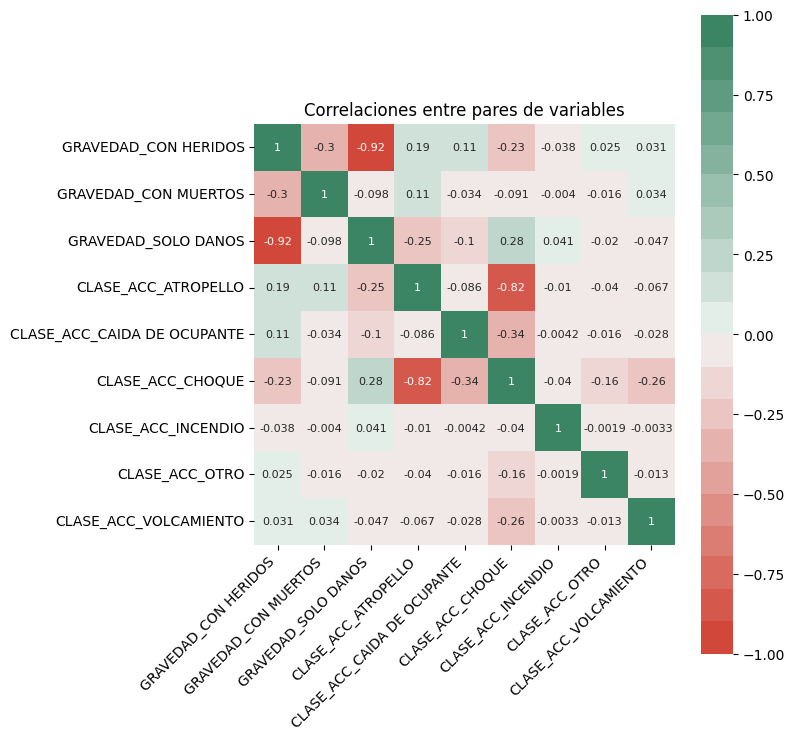

In [179]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sb.heatmap(
    corr_matrix,
    annot=True,
    cbar=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sb.diverging_palette(15, 150, n=20),
    square=True,
    ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)

ax.tick_params(labelsize=10)
ax.set_title("Correlaciones entre pares de variables")
plt.tight_layout()
plt.show()

In [180]:
# Aplicar PCA reduciendo a dos componentes principales
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(frequency_matrix_scaled)

Las primeras dos componentes nos representarian aproximadamente el 44% de la información total

In [181]:
pca.explained_variance_ratio_

array([0.26824043, 0.16738569])

In [182]:
pca.explained_variance_ratio_.sum()

np.float64(0.4356261246972601)

En la siguiente figura podremos ver graficamente la proporción de la varianza total en el conjunto de datos original explicada por cada componente principal.

C:\Users\laura\AppData\Local\Temp\ipykernel_8120\132107377.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=[f"PC{i+1}" for i in range(2)], y=pca.explained_variance_ratio_, palette='viridis')


<Axes: >

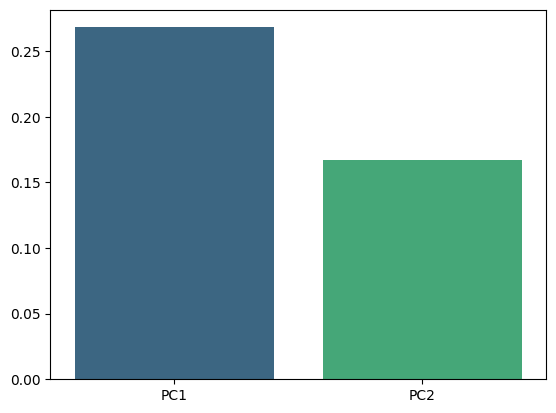

In [183]:
sb.barplot(x=[f"PC{i+1}" for i in range(2)], y=pca.explained_variance_ratio_, palette='viridis')

La siguiente grafica nos muestra la dispersión de los datos basado en la frecuencia de atributos en las dos primeras componentes principales, como se podrá notar no se dispone de una cantidad significativa de información para armar conjetura alguna más que la visualización de esta dispersión.

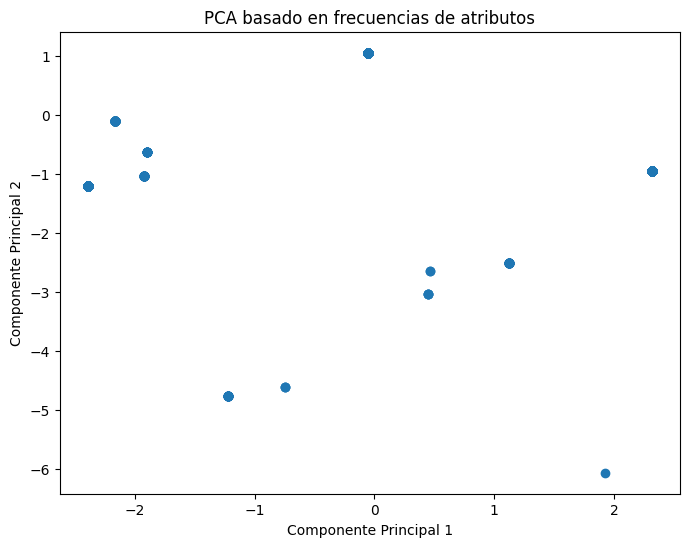

In [185]:
# Visualización de los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA basado en frecuencias de atributos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

De igual forma podriamos ver la contribución de cada atributo a cada componente principal y adicional podremos ver cuánta información captura cada componente principal y cuántos componentes necesitamos para representar adecuadamente los datos de siniestrialidad en la Bogotá. En este caso si consideramos las primeras tres componentes capturariamos el 46% de la variabilidad, lo cual es insuficiente para la mayoria de los análisis.

In [186]:
pca = PCA(n_components=5)  # cOnsideramos hasta 5 componentes principales
pca_result = pca.fit_transform(frequency_matrix_scaled)

print("Varianza por cada componente principal:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2f} ({var*100:.0f}%)")

Varianza por cada componente principal:
PC1: 0.27 (27%)
PC2: 0.17 (17%)
PC3: 0.12 (12%)
PC4: 0.11 (11%)
PC5: 0.11 (11%)


A continuación realizamos un análisis de las primeras tres componentes junto a su gráfica.

In [187]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(frequency_matrix_scaled)

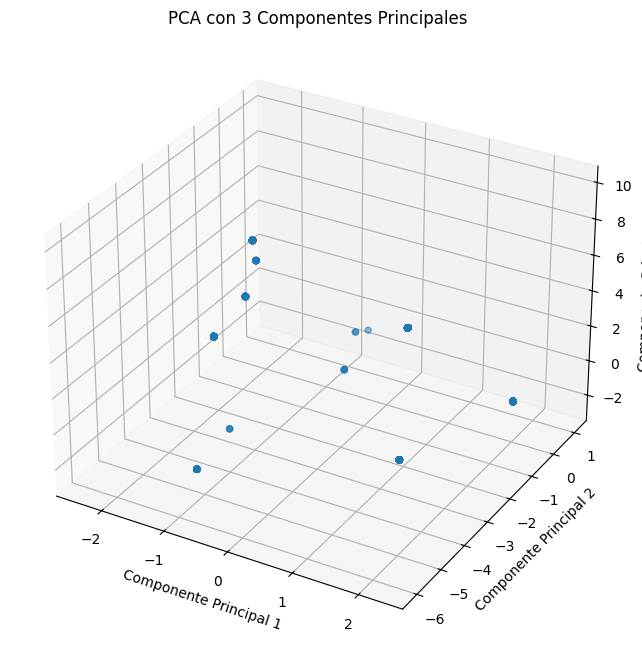

In [188]:
# Graficar los componentes principales en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2') 
ax.set_zlabel('Componente Principal 3')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)

ax.set_title("PCA con 3 Componentes Principales")
plt.show()